In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline

from tensorflow.keras.layers import Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions



In [3]:
nrow = 224
ncol = 224
nchan = 3


train_data_dir = './Dataset'
batch_size = 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')

test_data_dir = './Val'
batch_size = 128
test_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
                        test_data_dir,
                        target_size=(nrow,ncol),
                        batch_size=batch_size,
                        class_mode='categorical')


Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [4]:
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray',origin="lower")    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

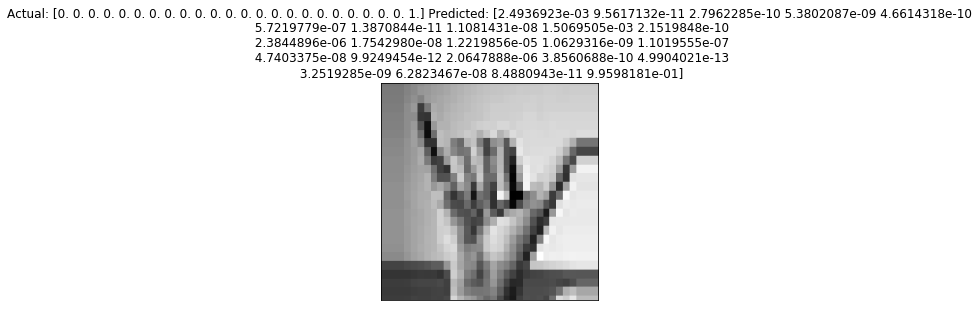

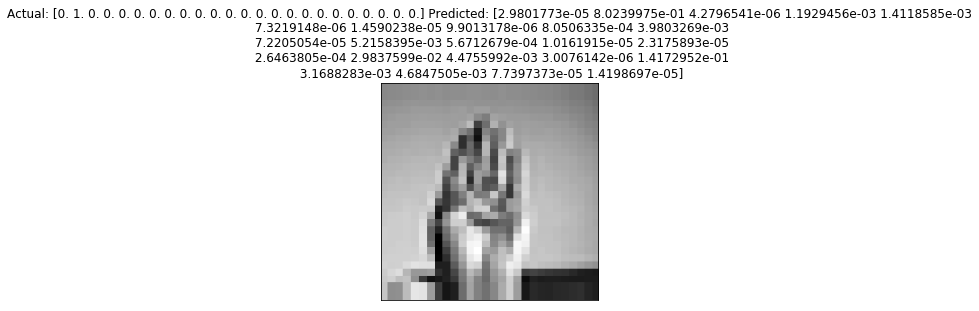

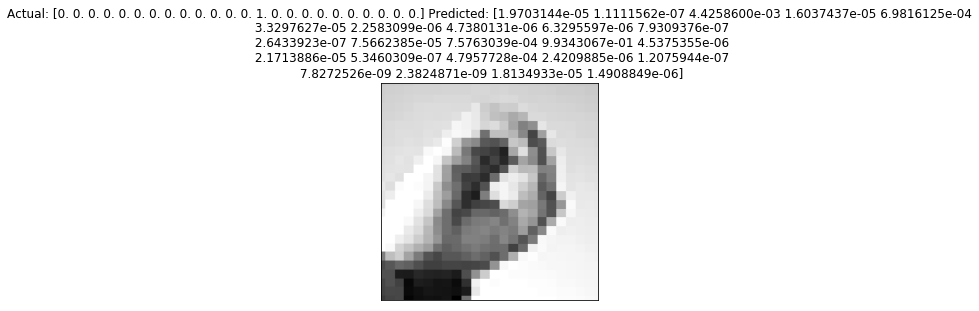

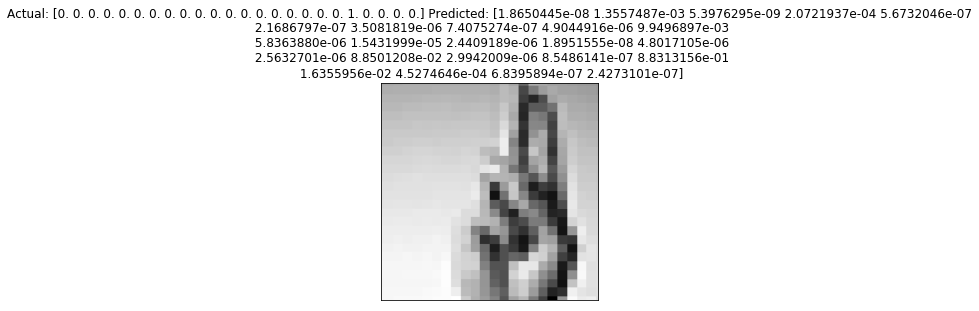

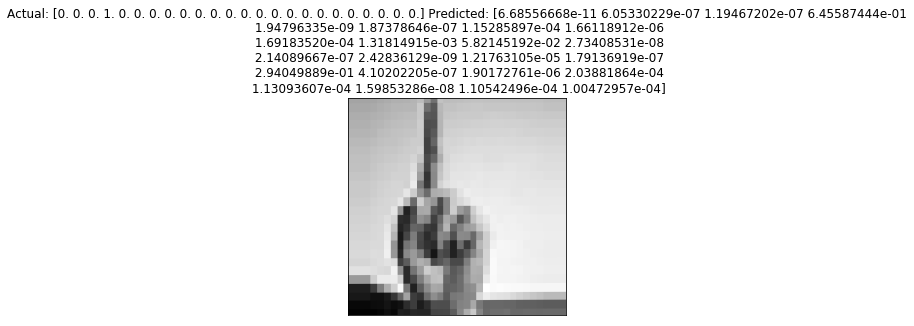

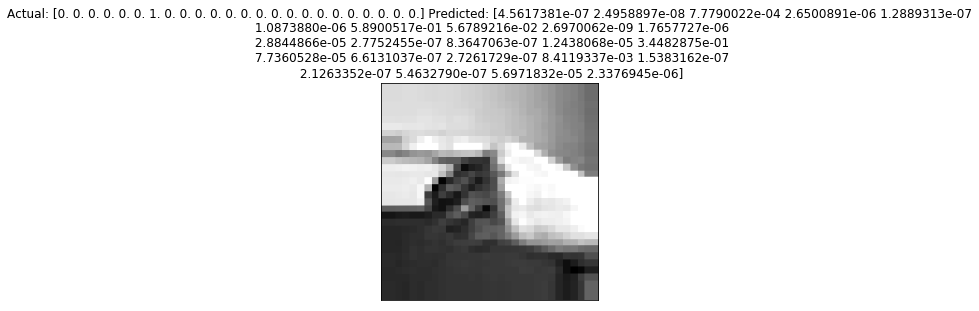

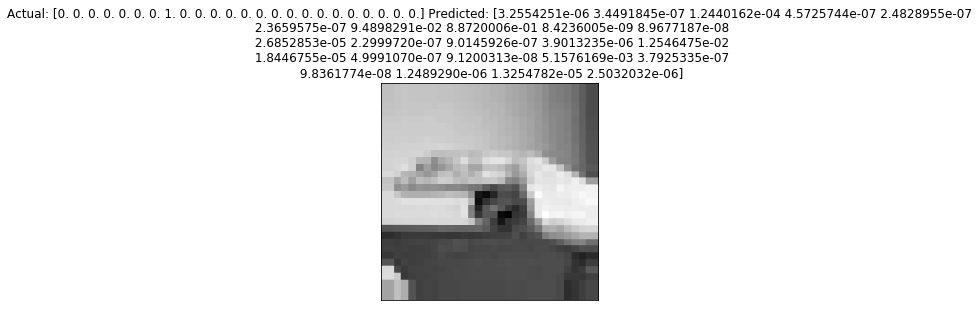

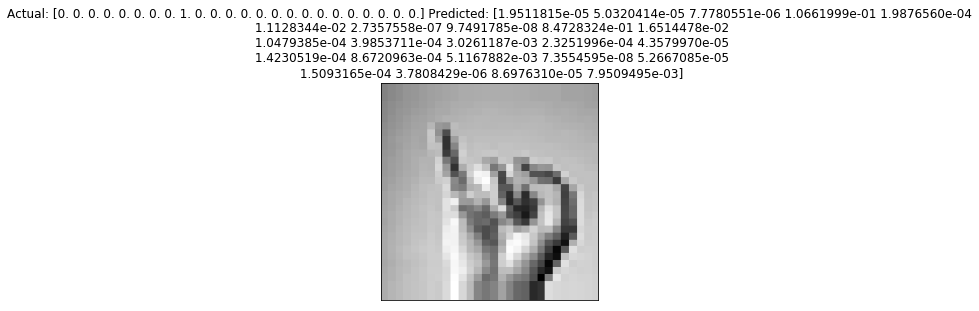

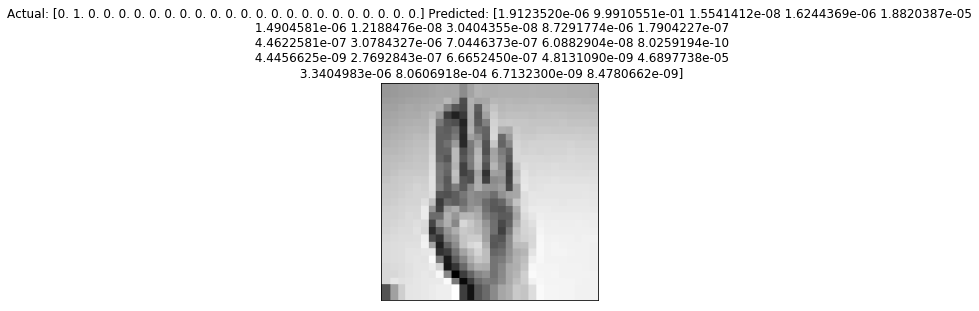

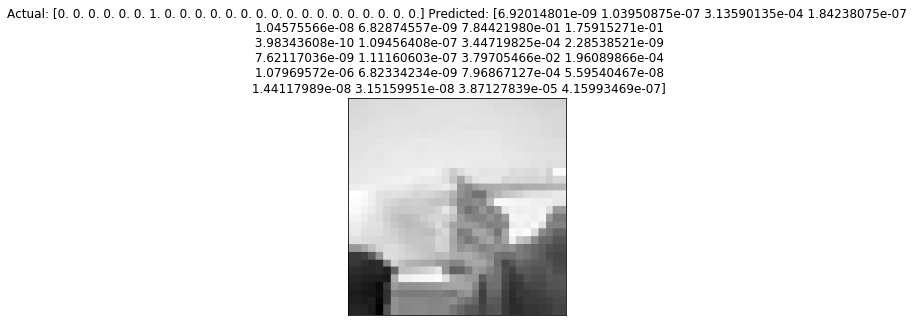

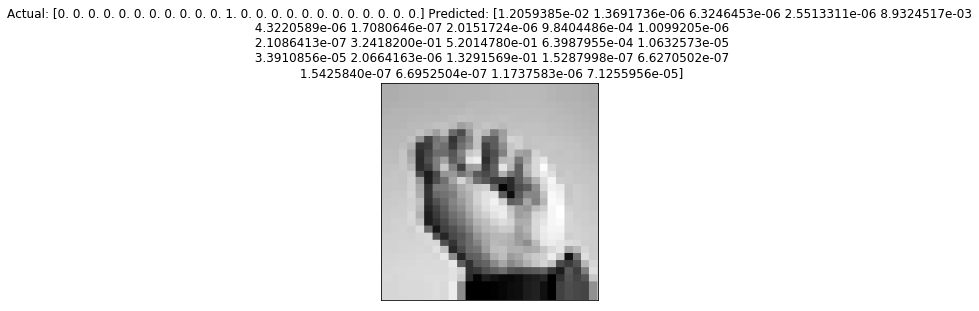

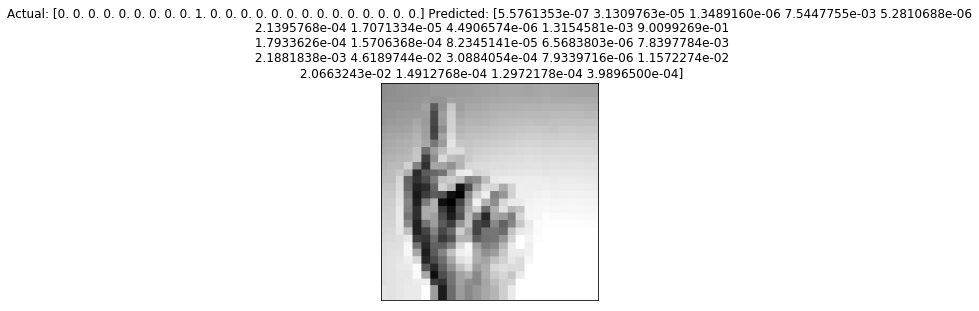

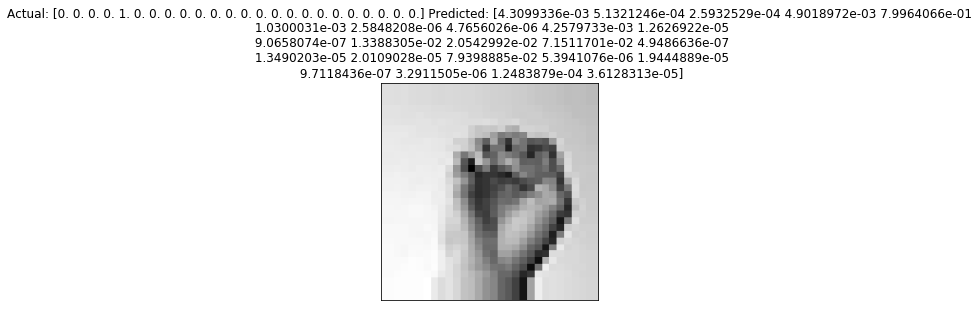

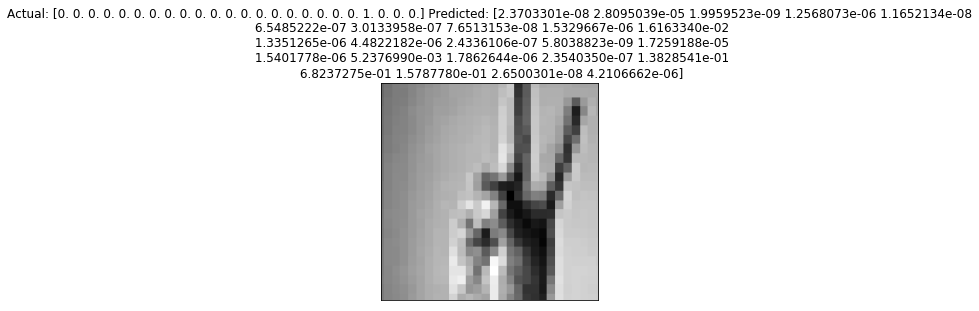

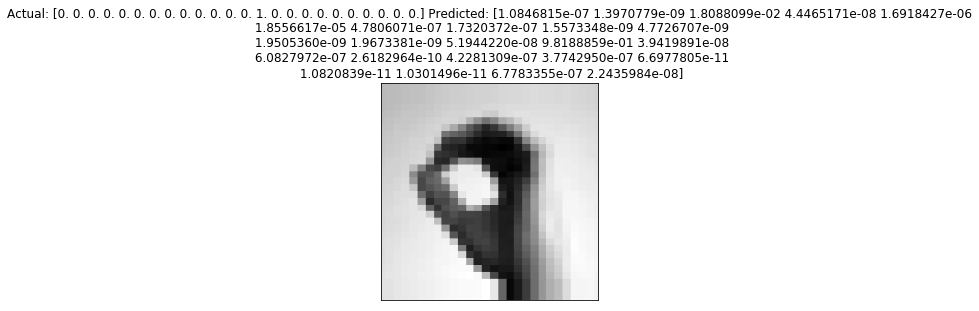

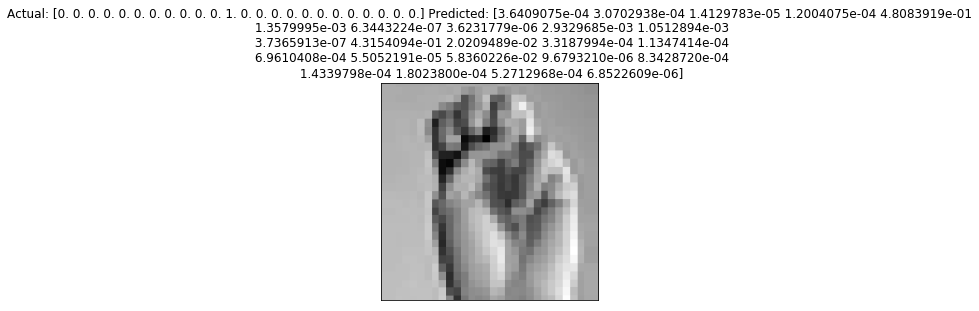

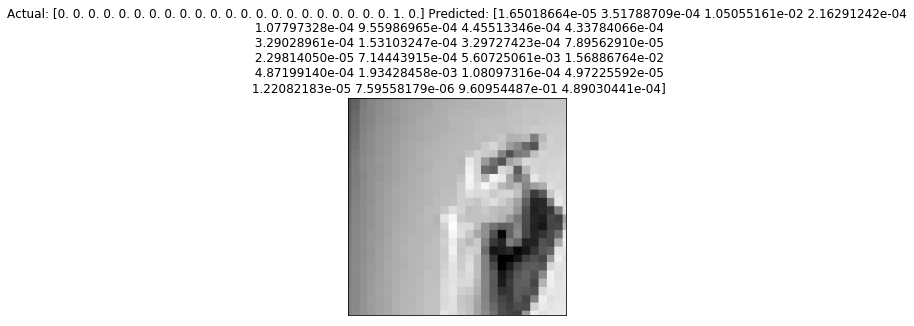

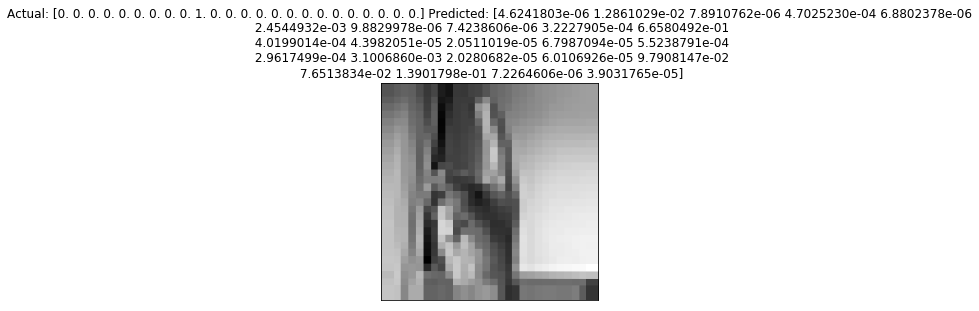

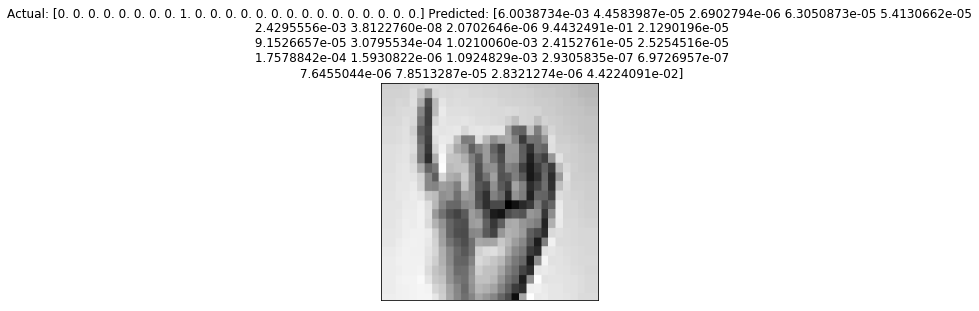

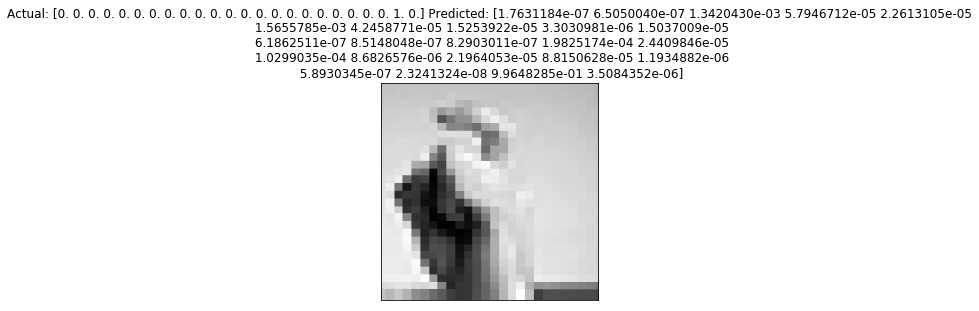

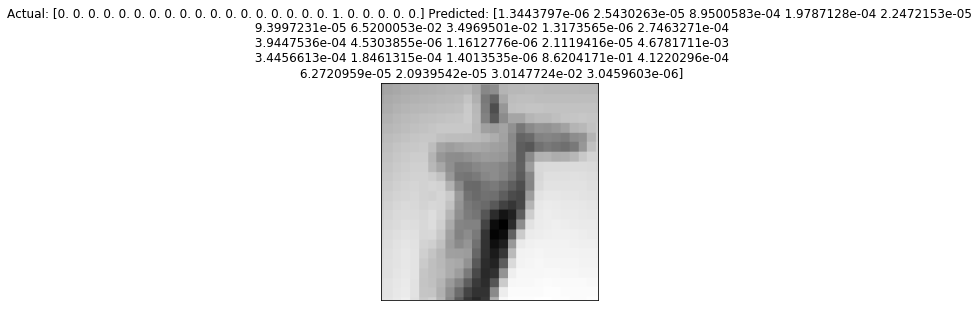

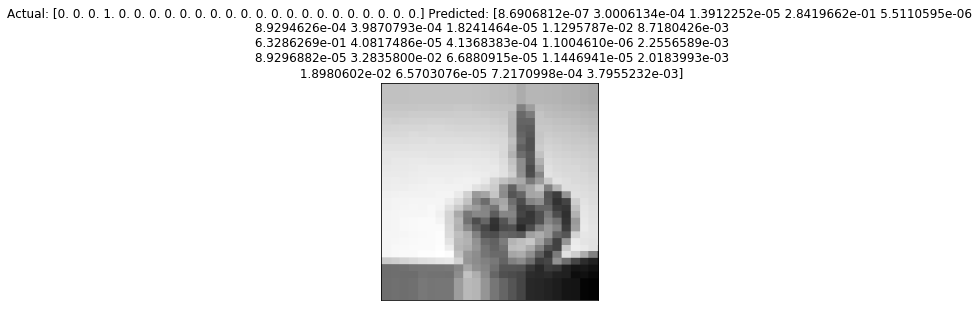

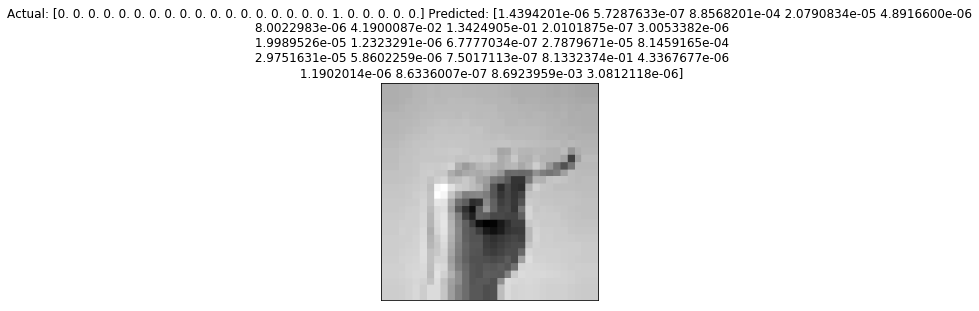

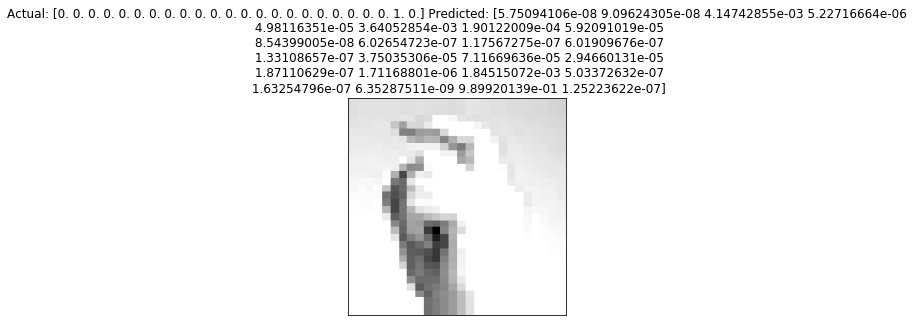

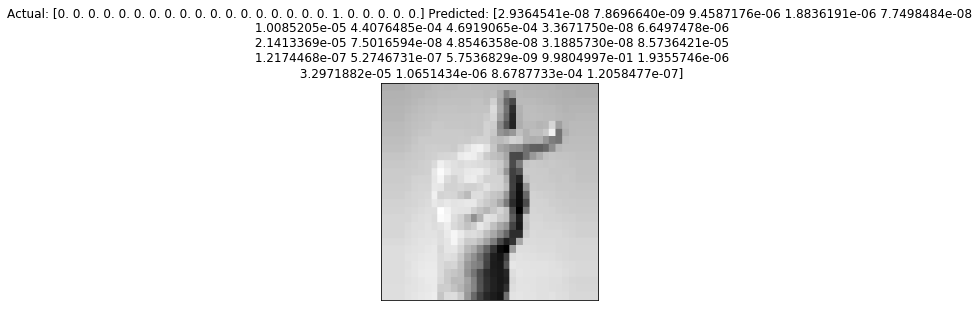

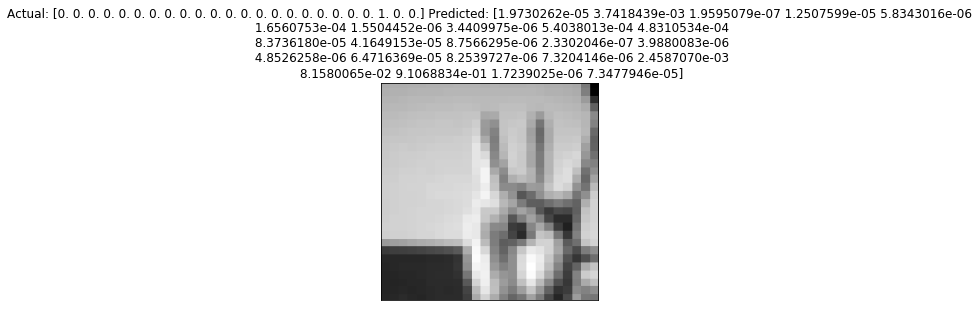

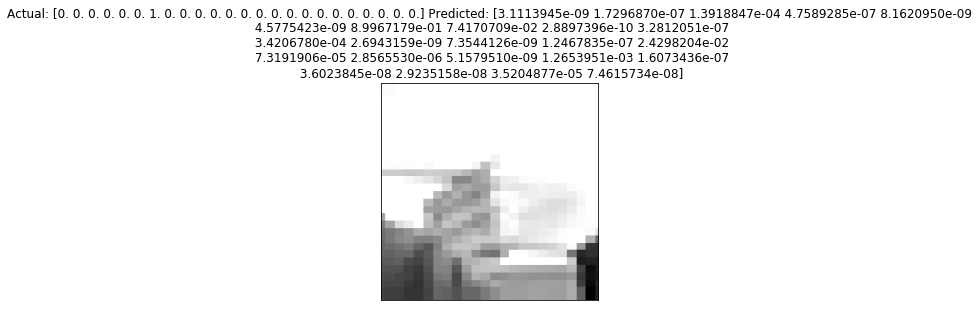

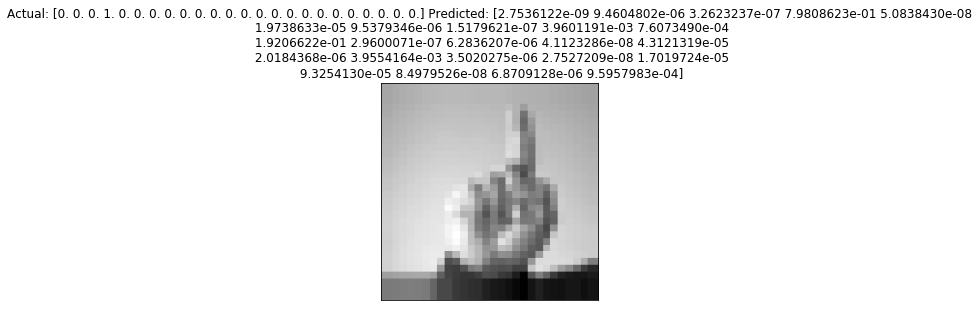

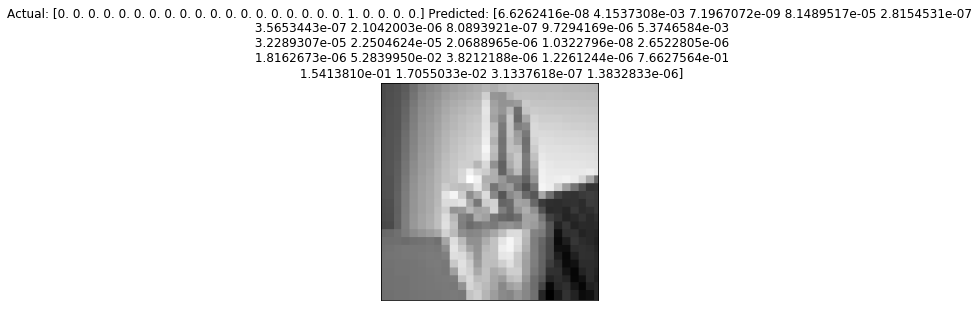

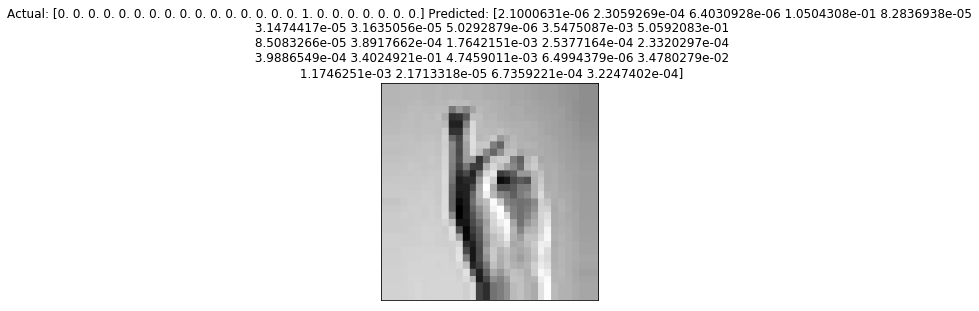

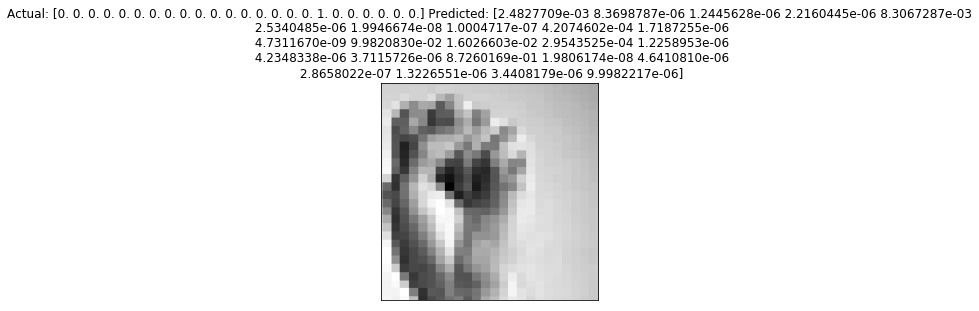

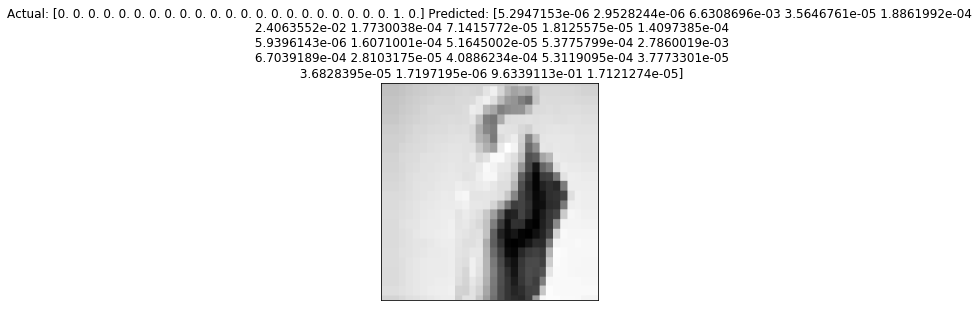

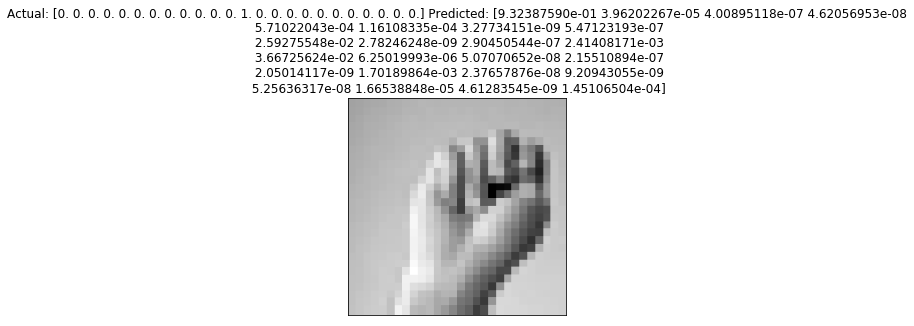

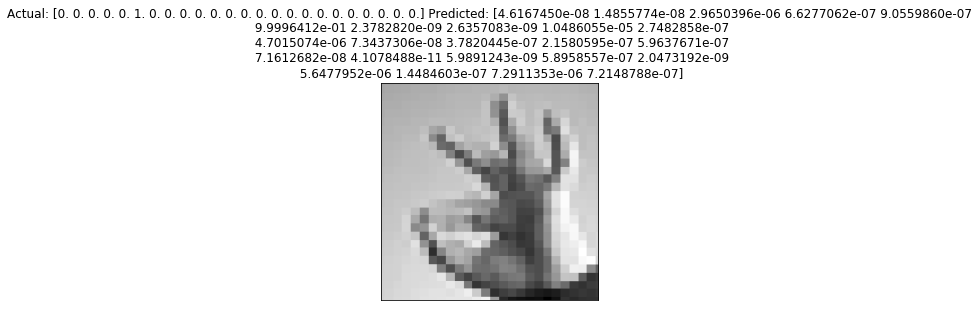

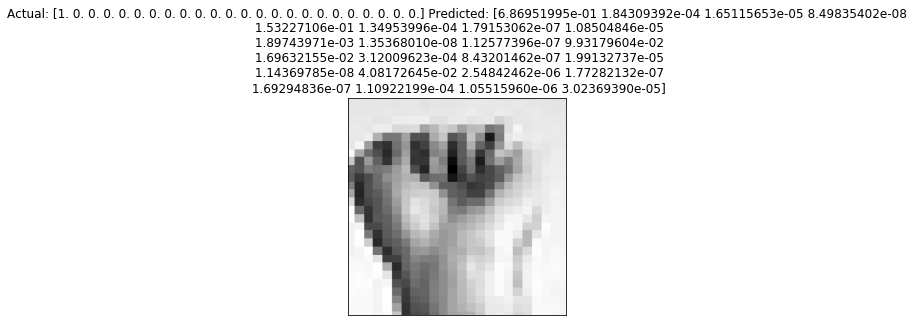

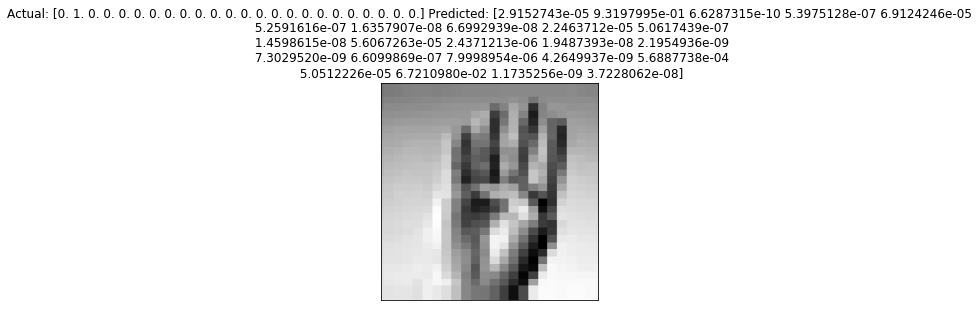

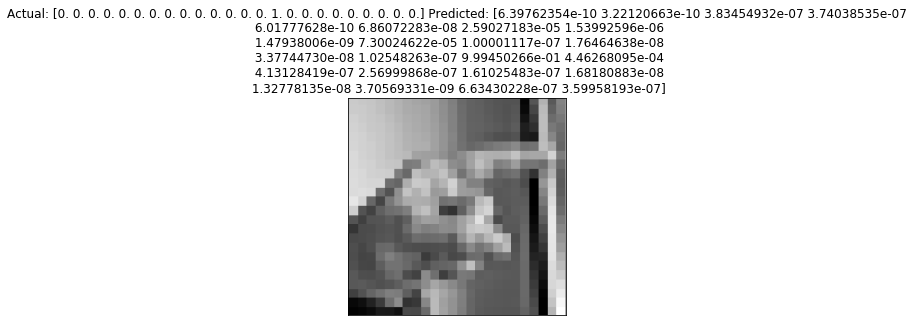

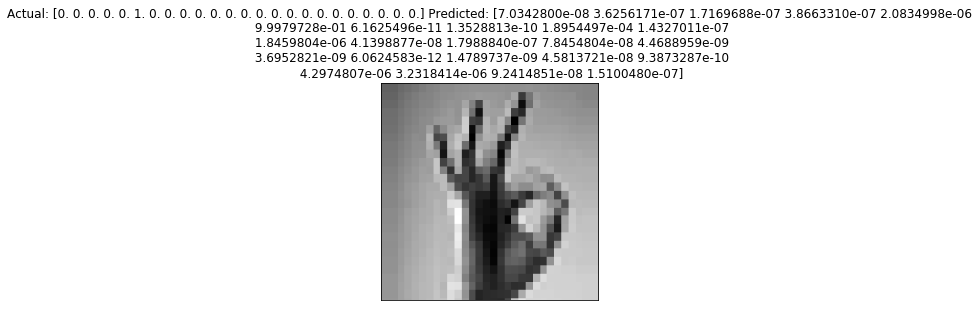

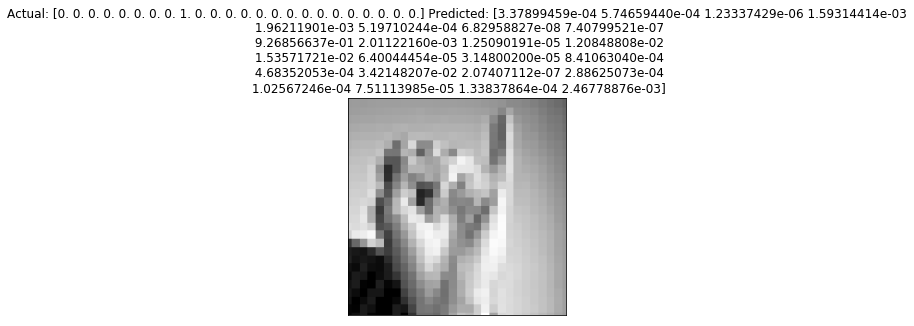

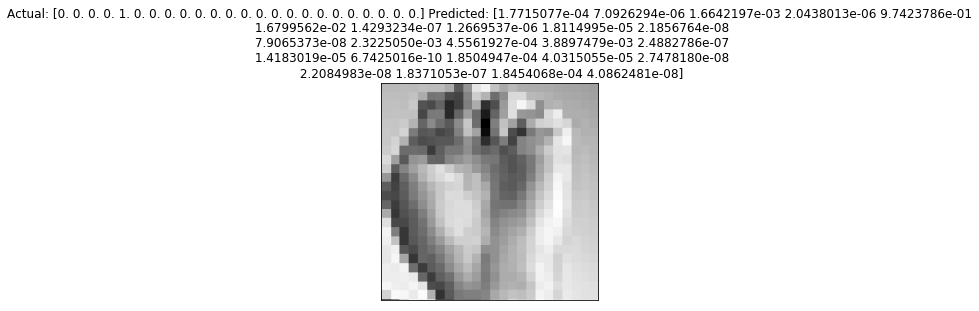

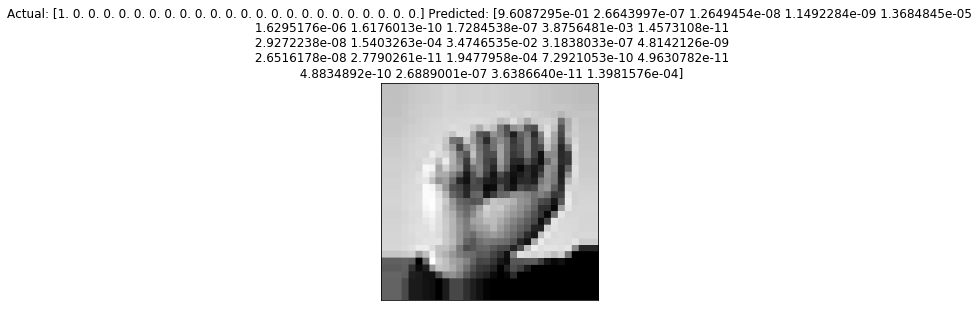

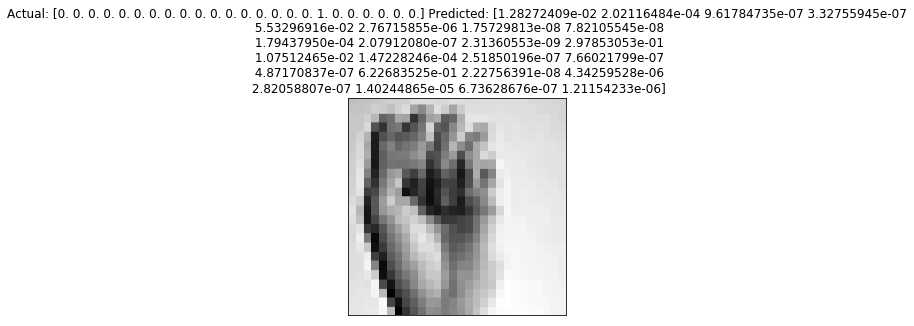

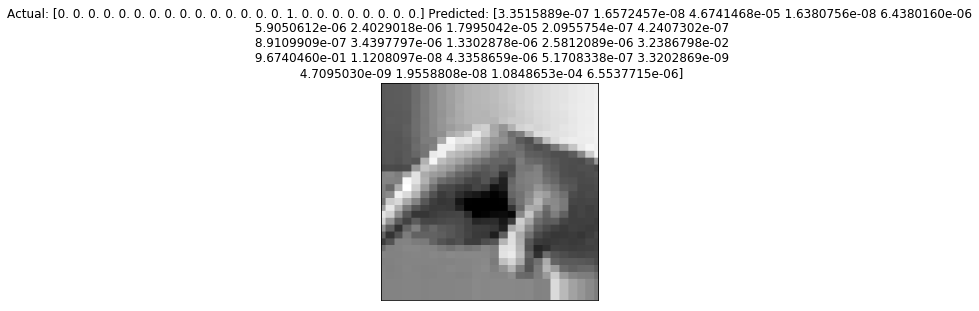

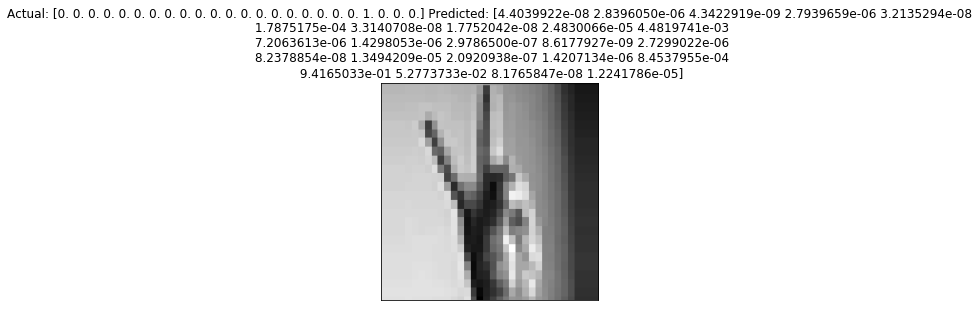

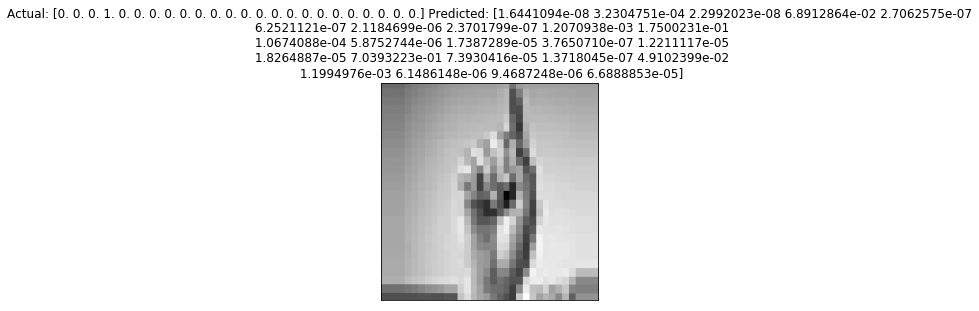

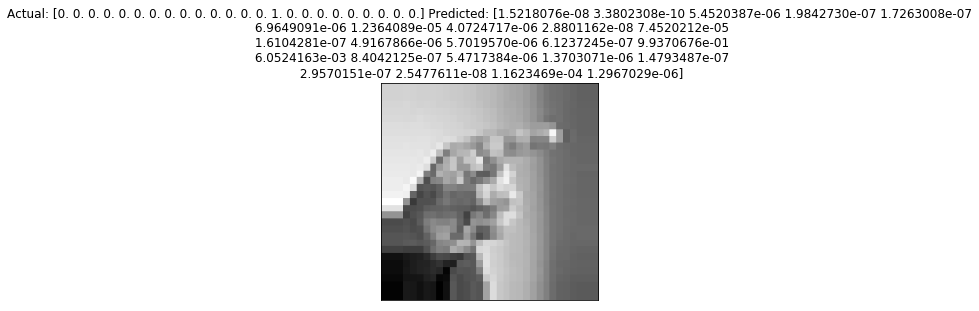

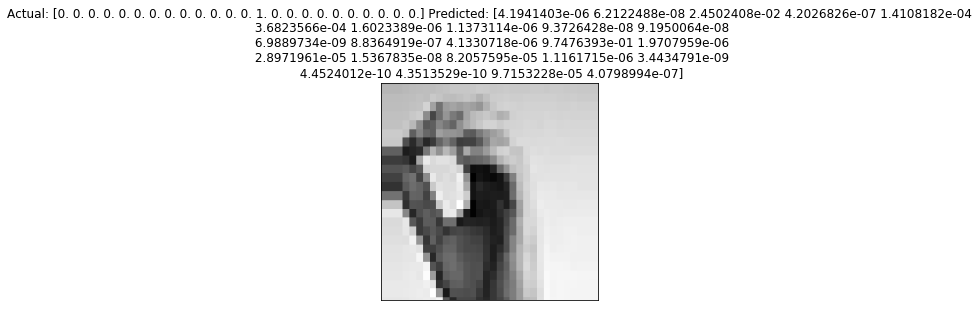

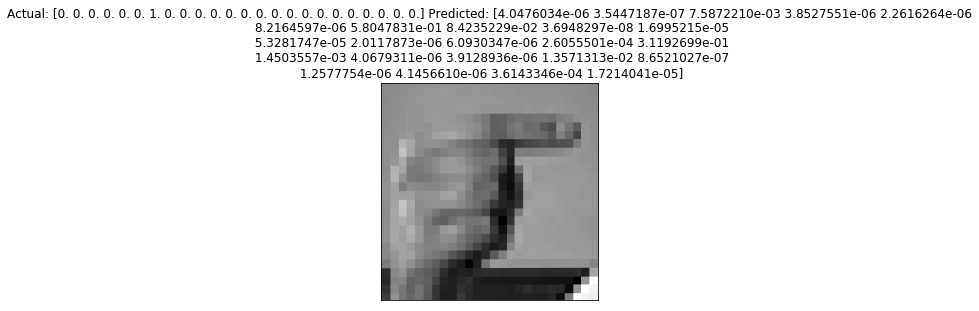

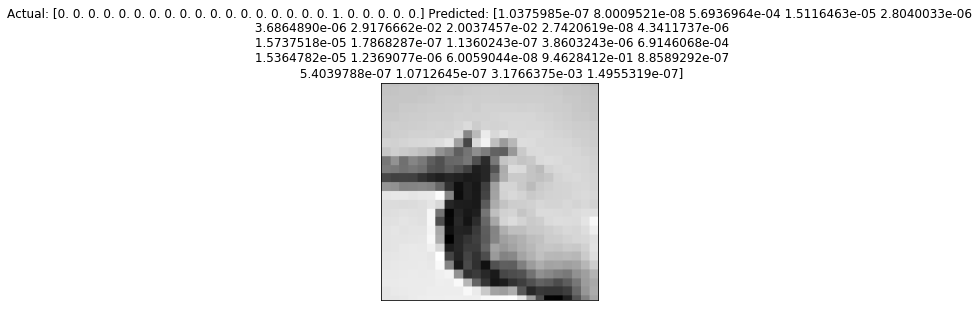

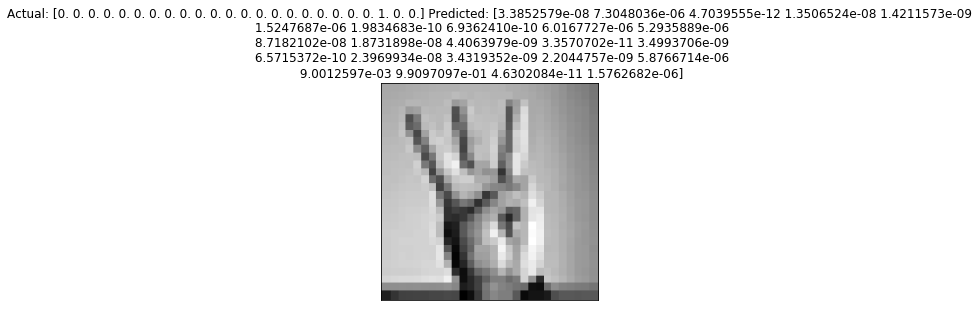

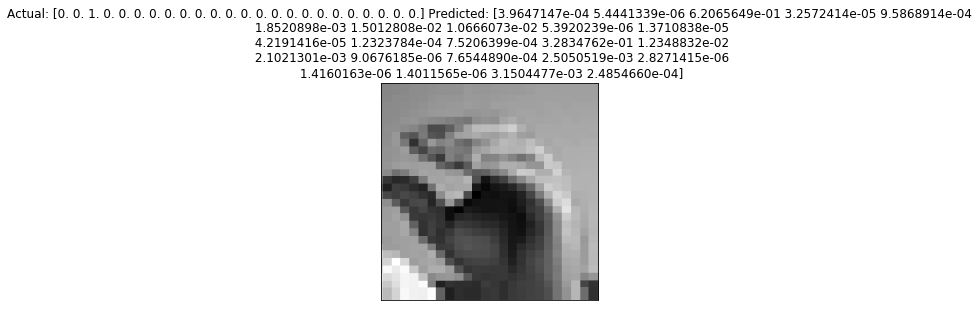

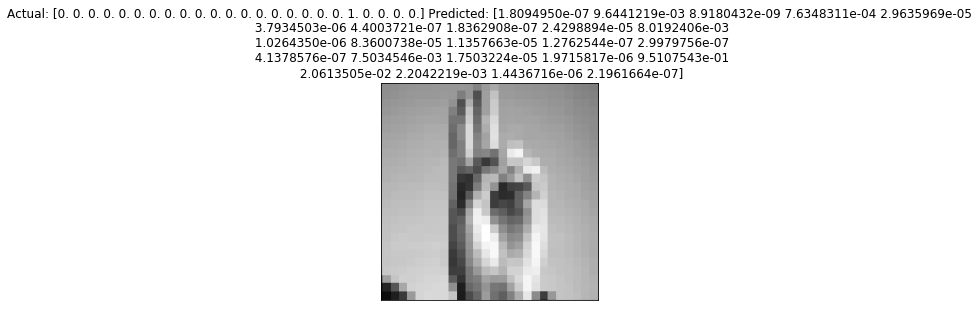

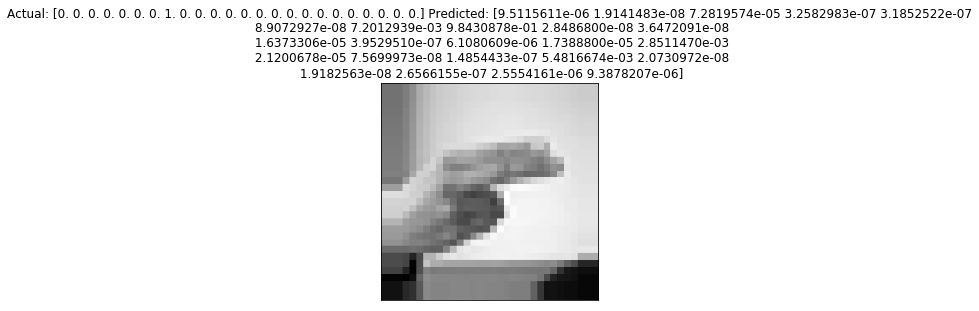

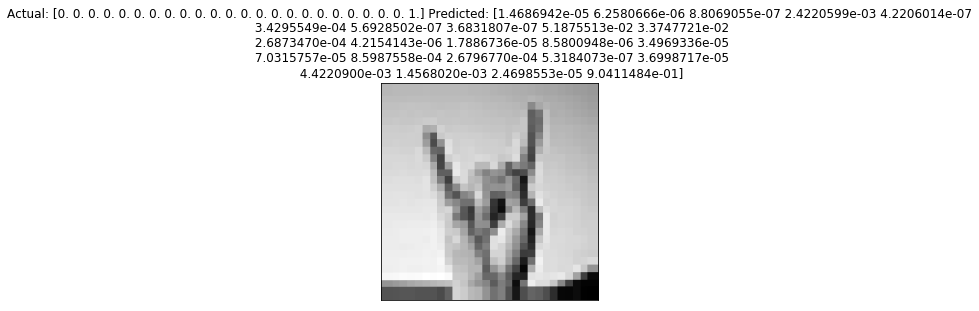

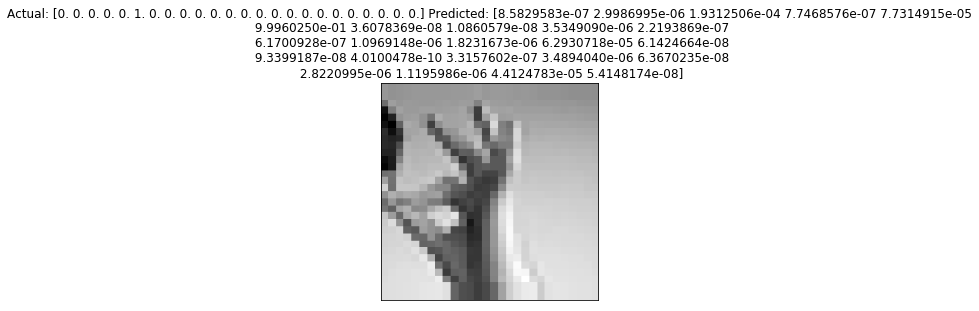

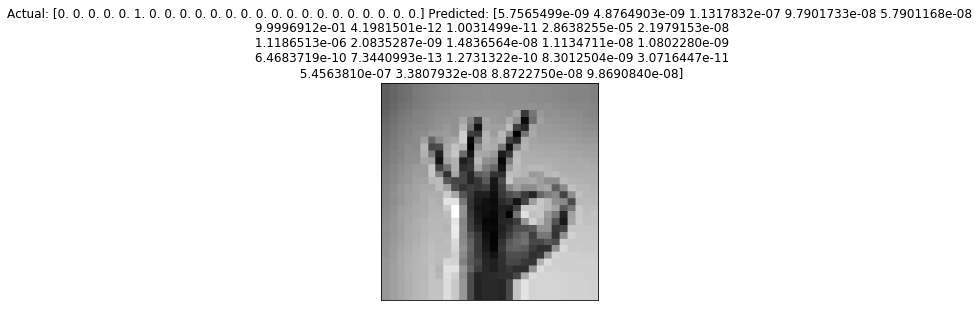

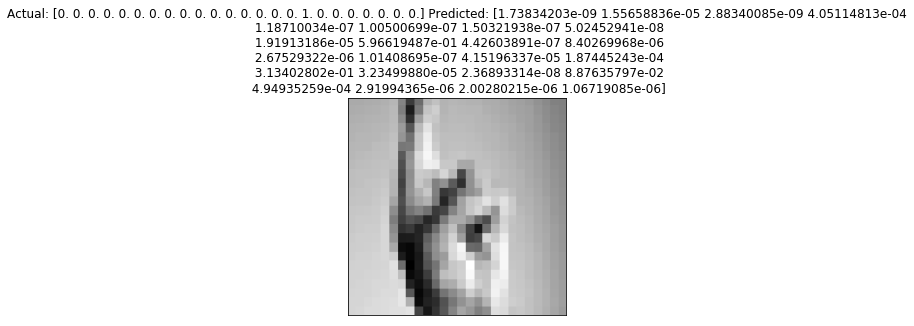

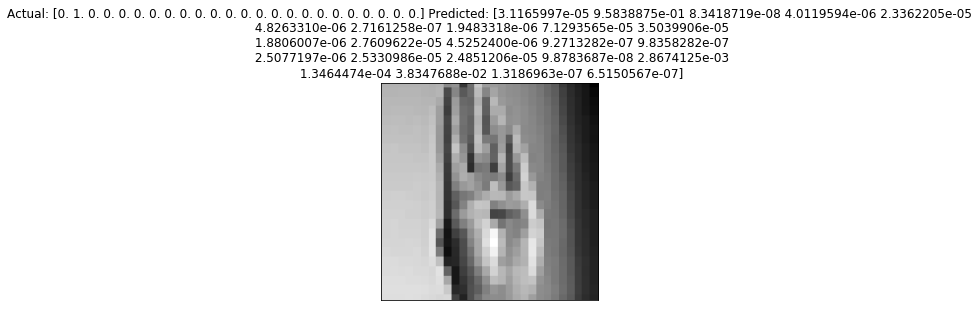

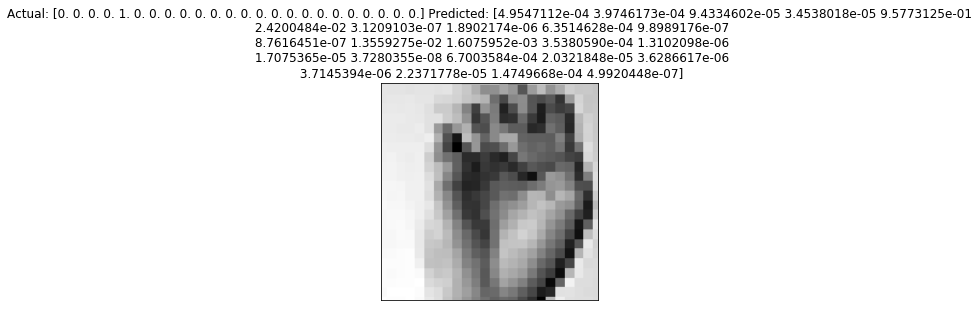

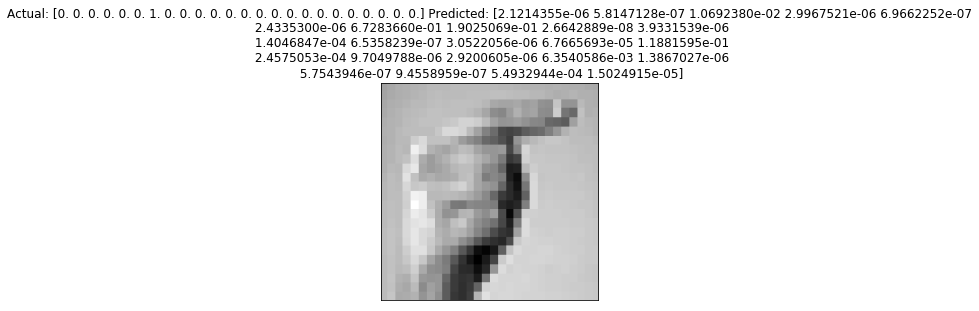

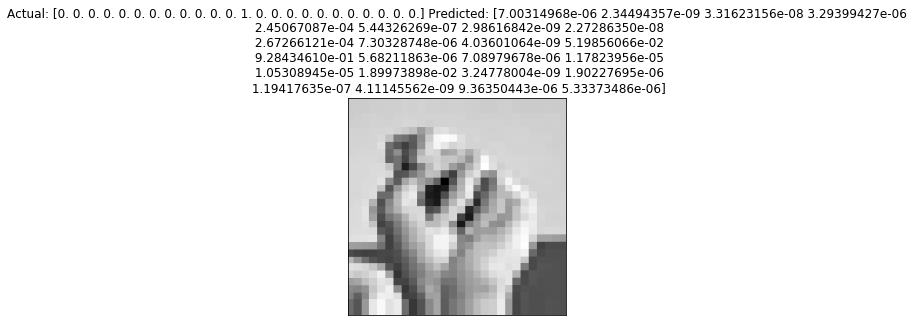

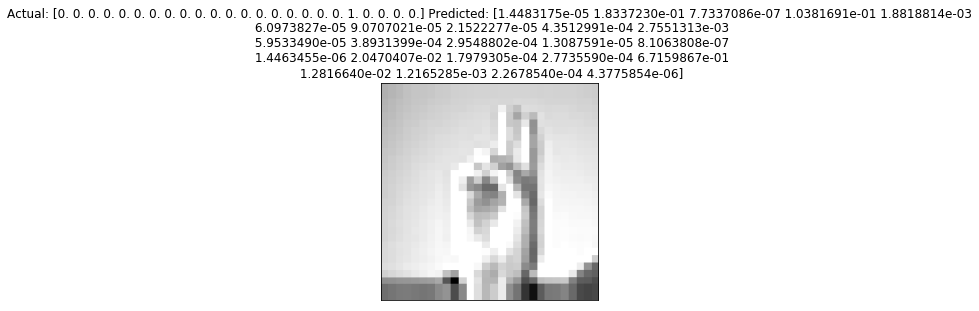

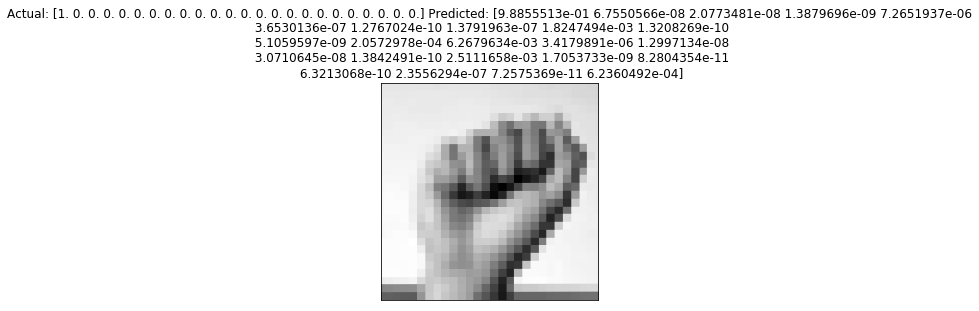

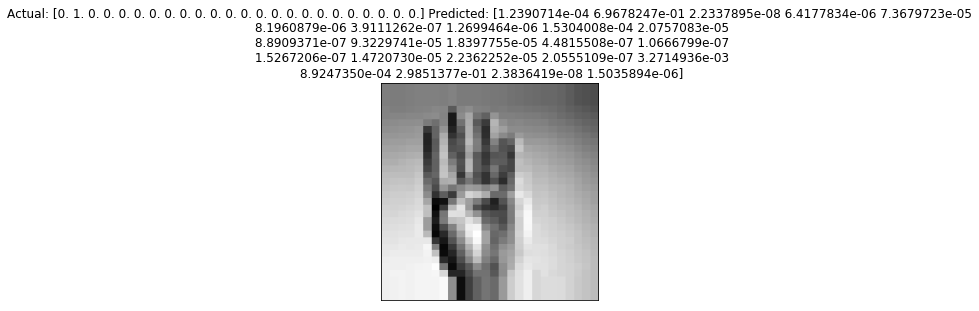

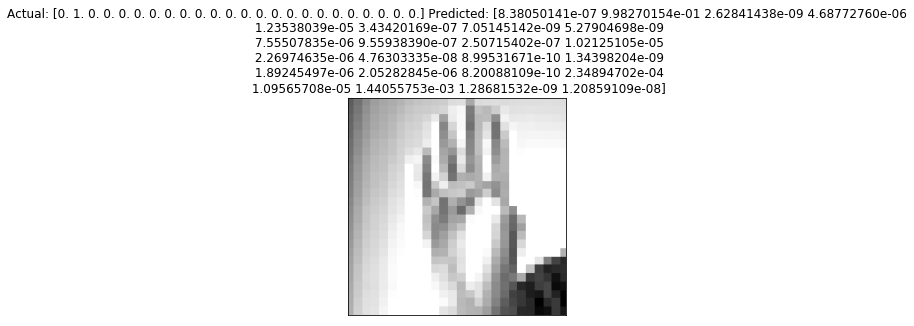

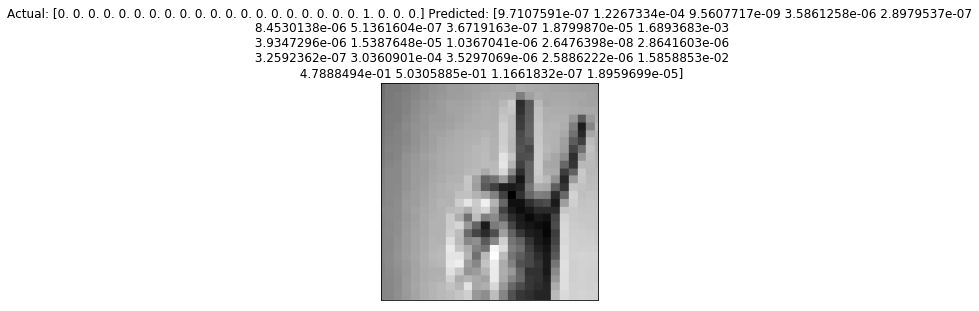

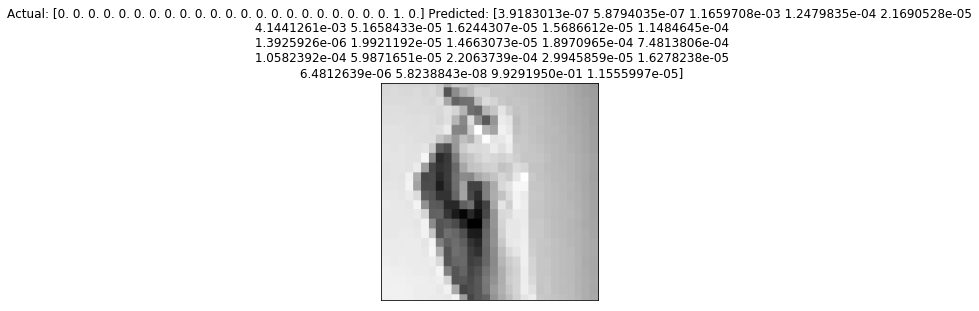

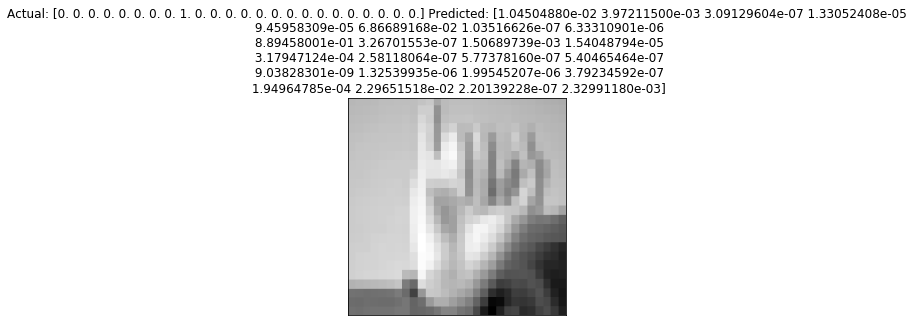

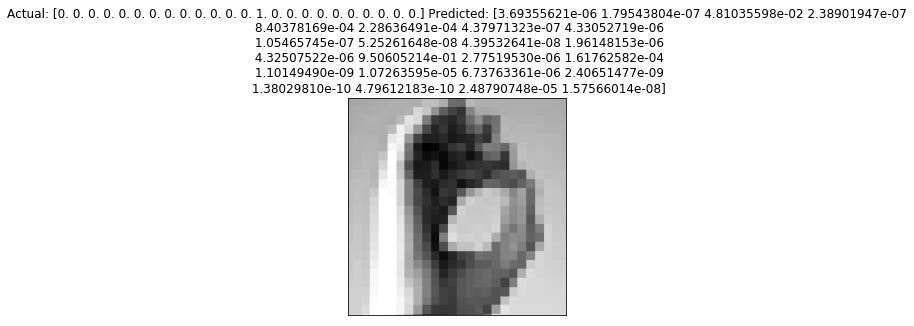

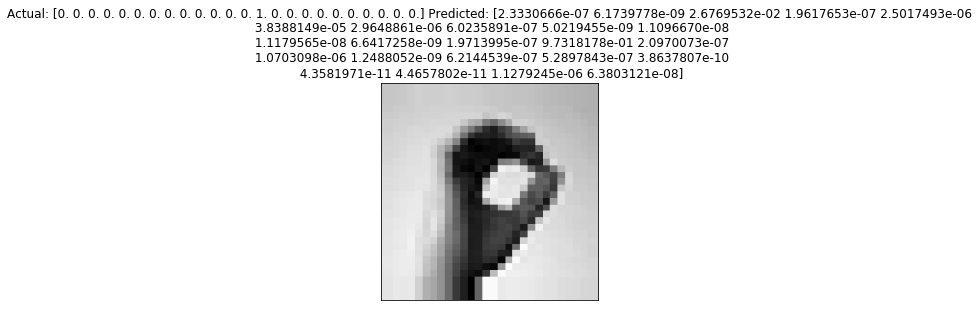

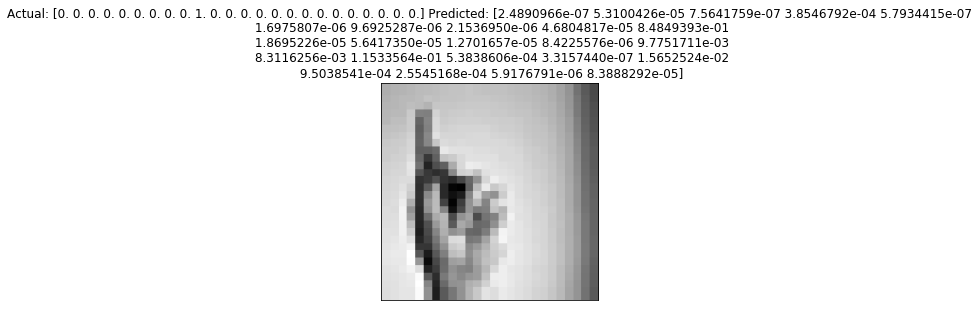

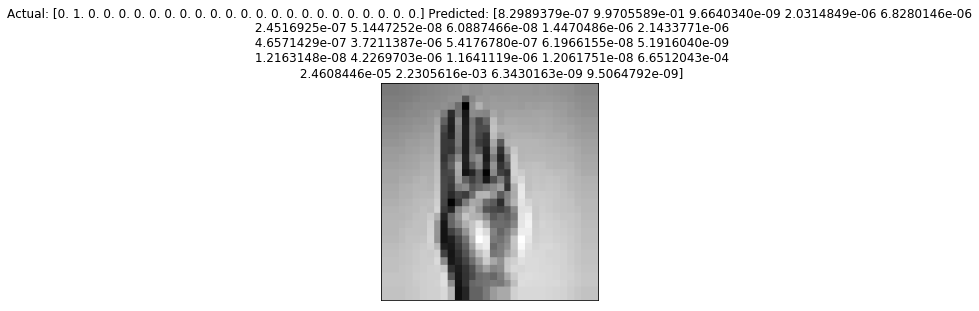

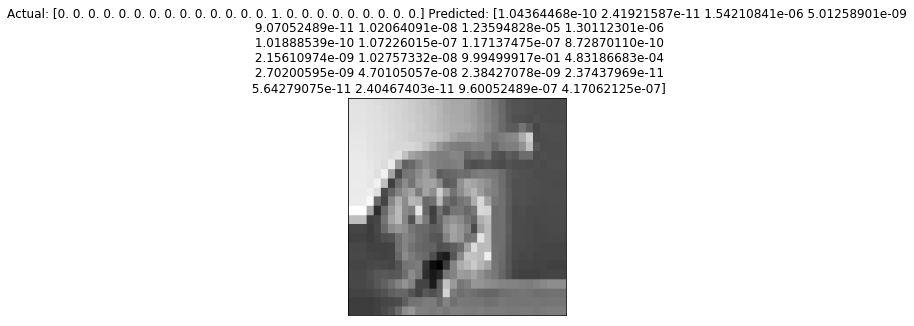

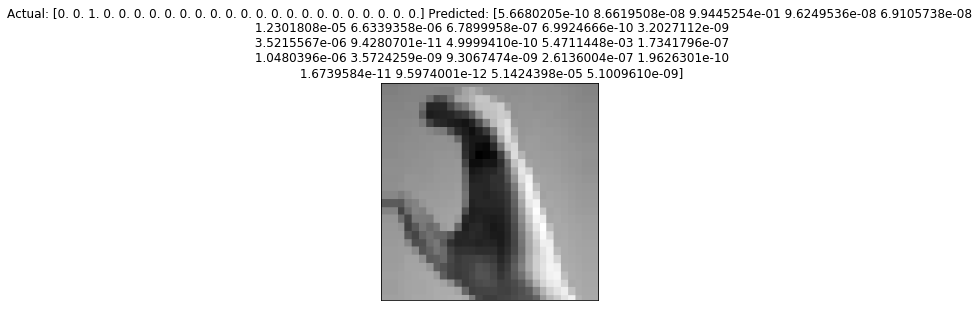

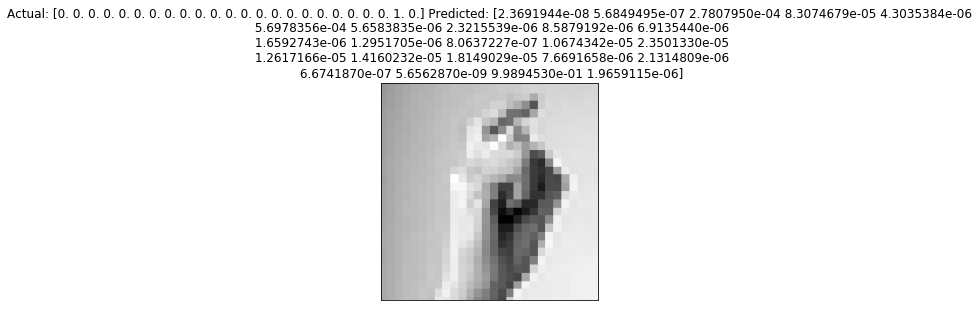

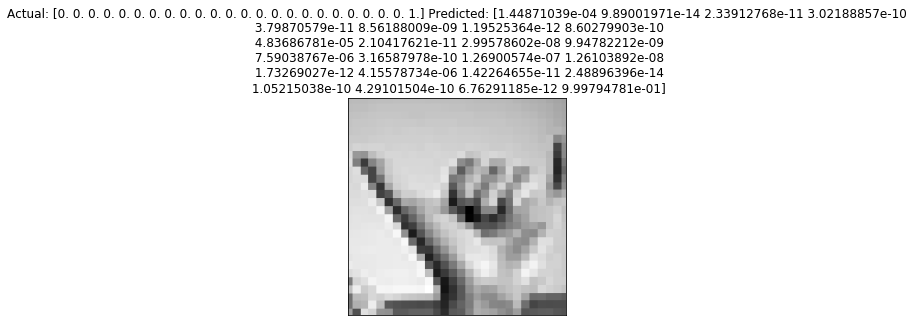

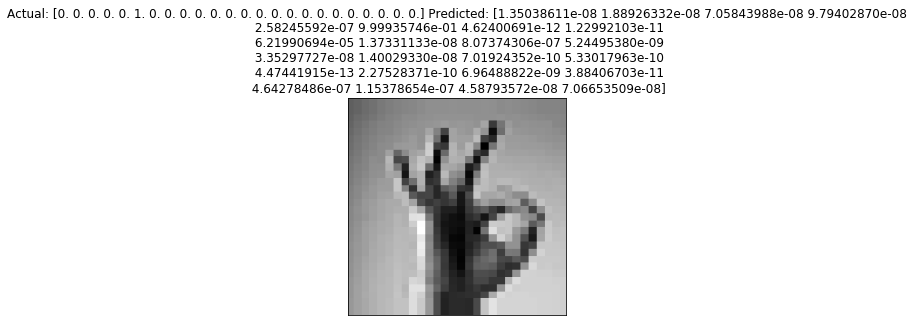

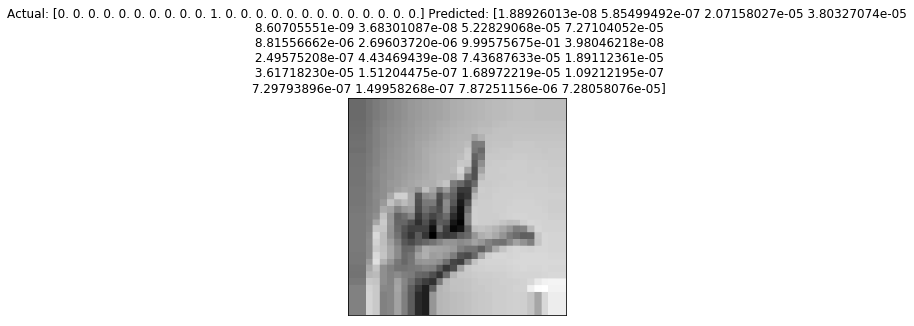

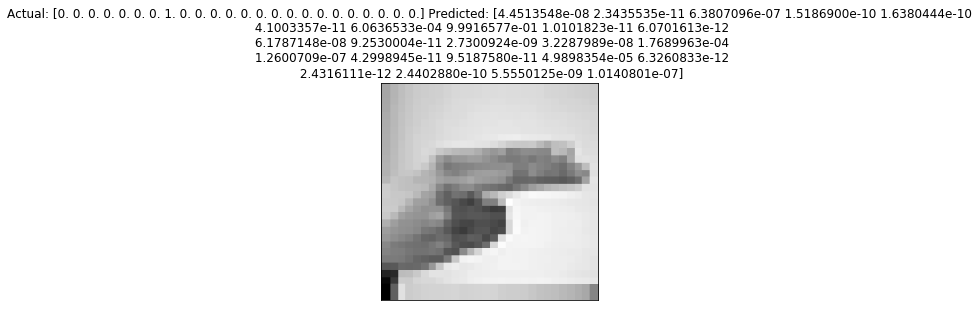

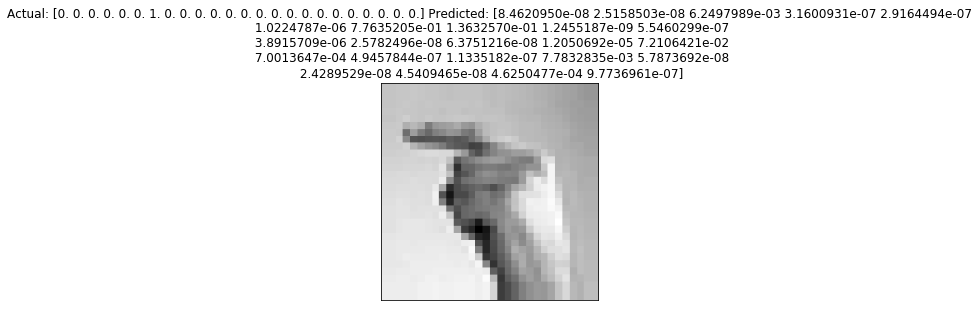

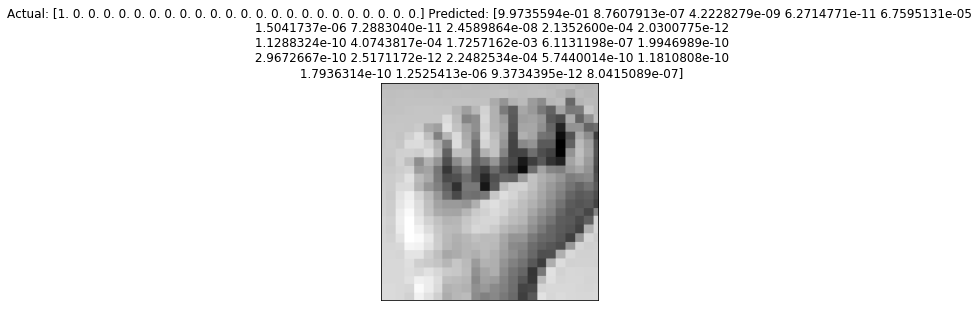

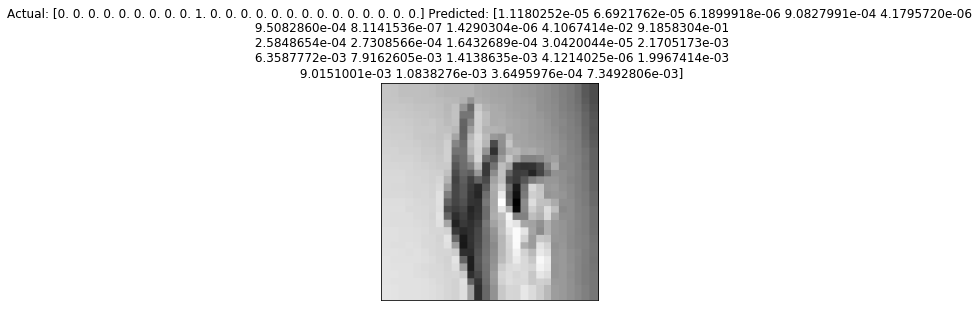

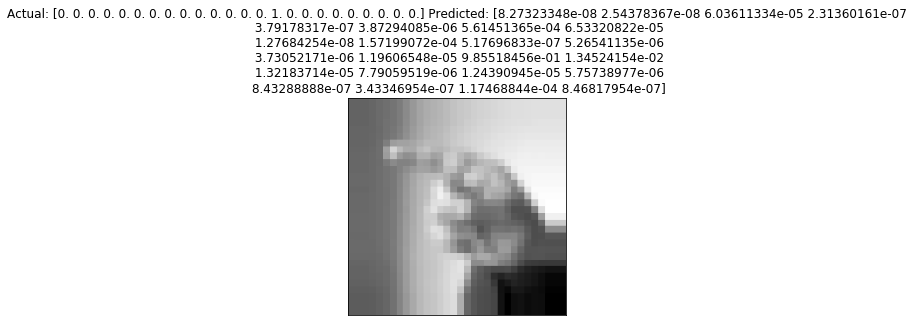

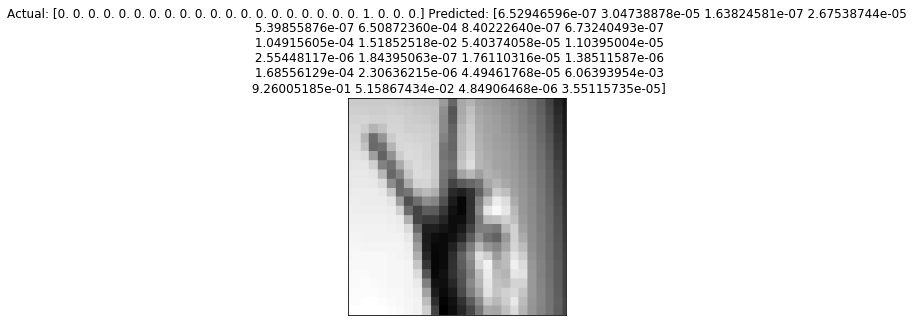

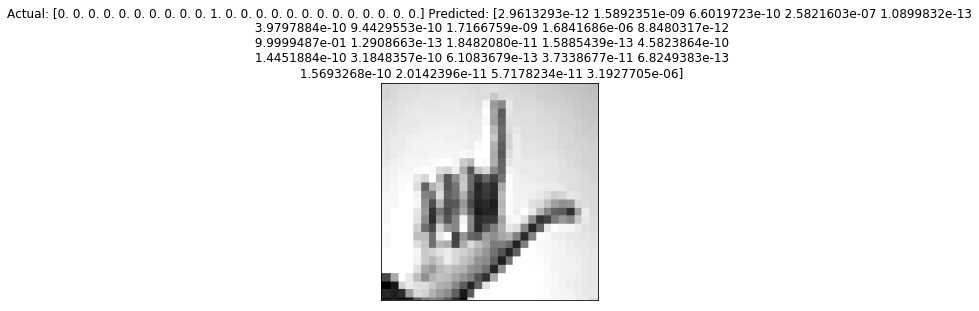

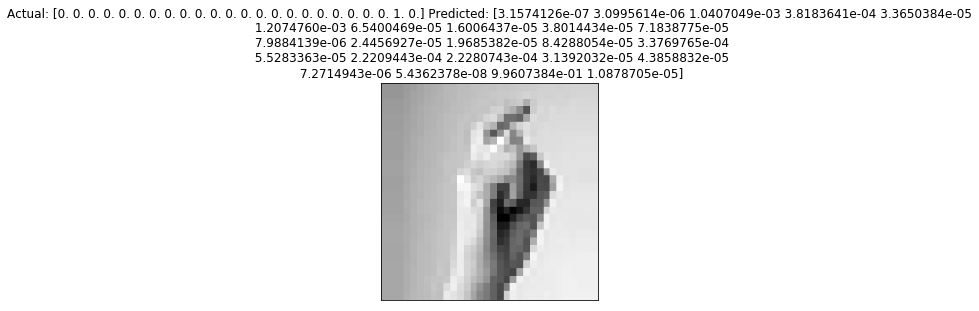

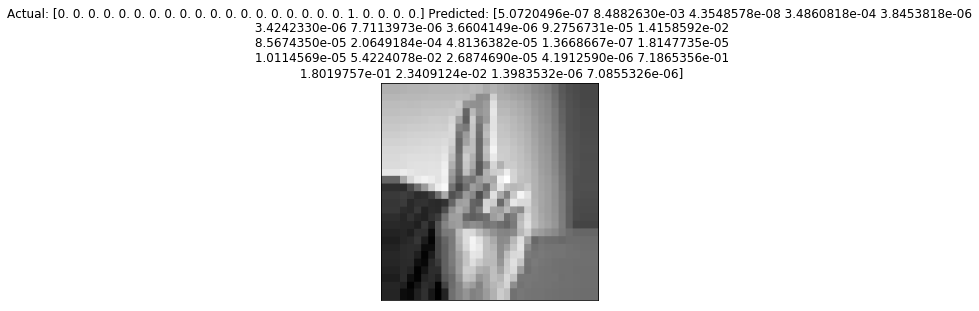

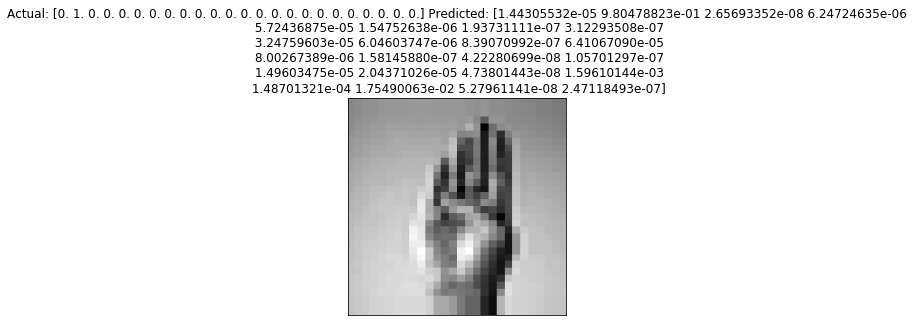

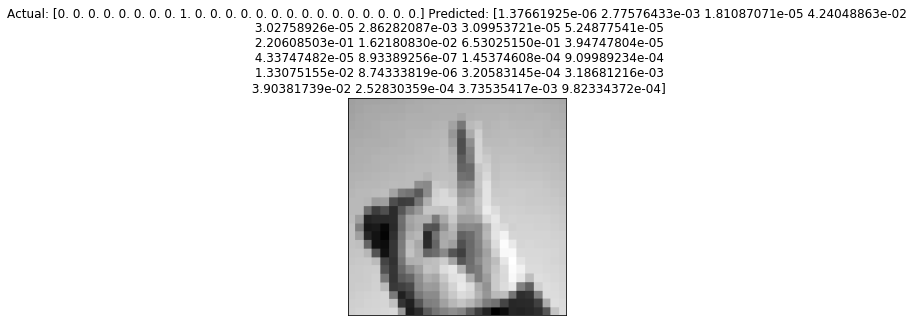

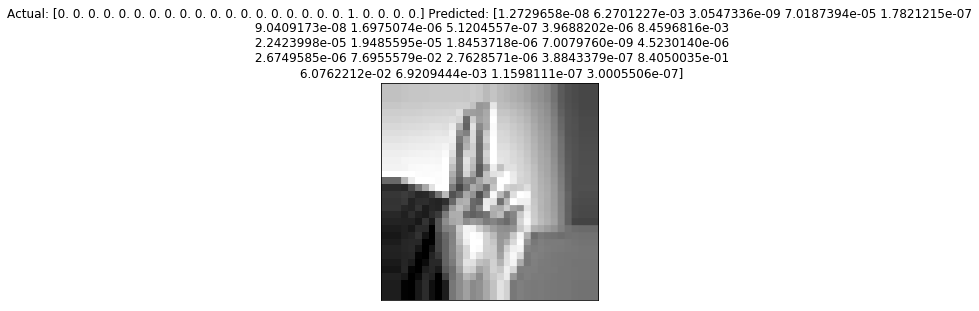

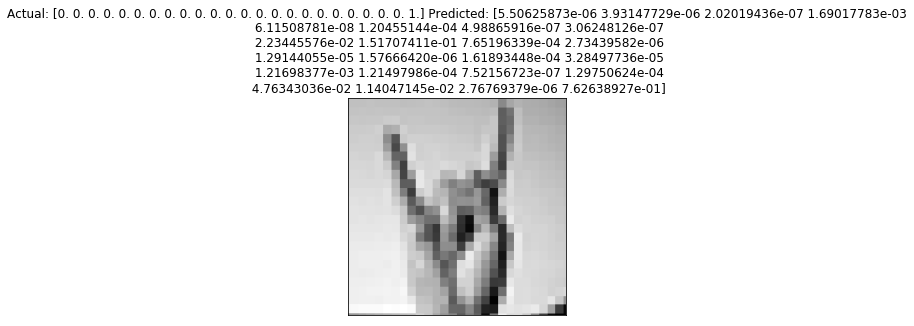

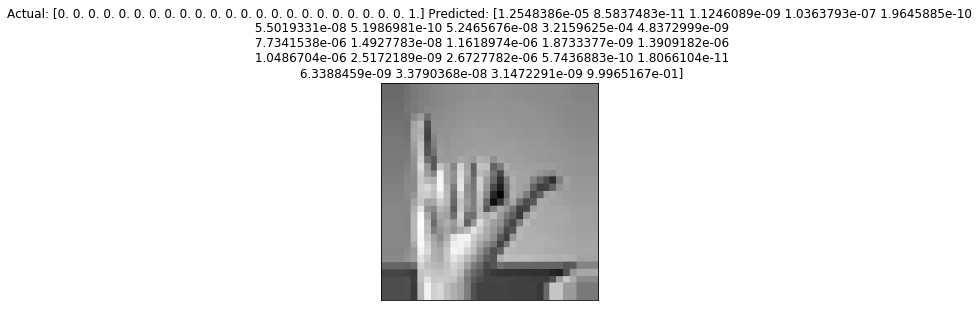

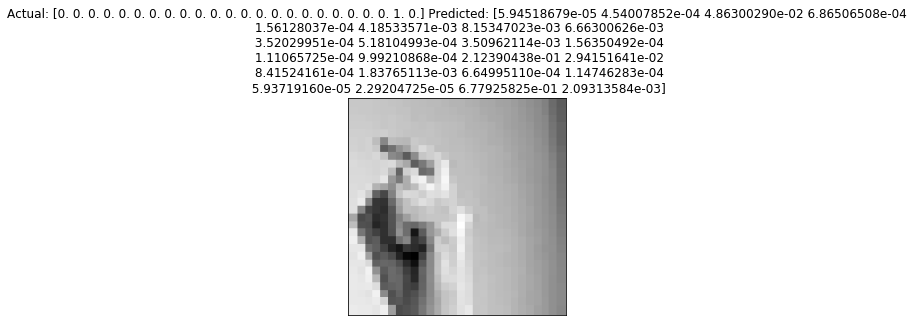

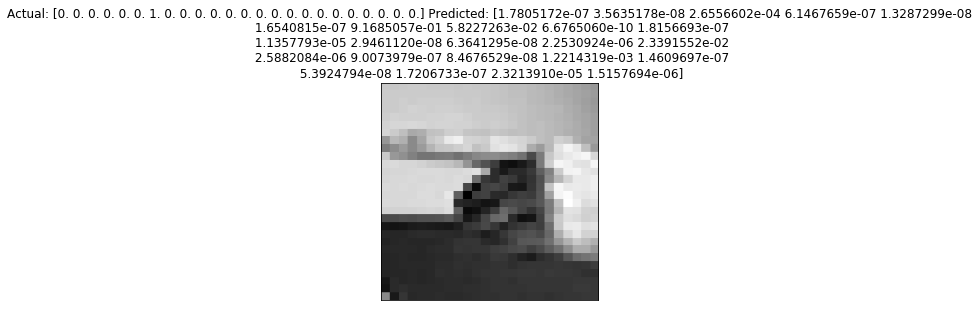

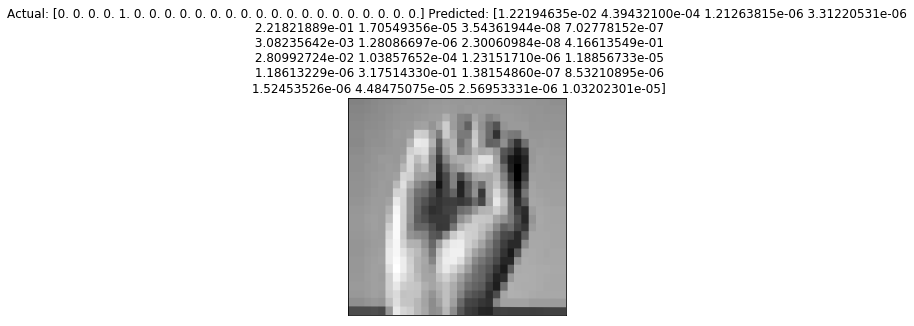

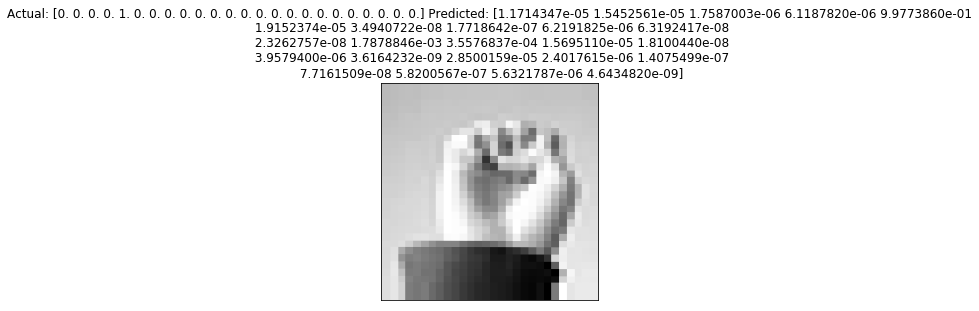

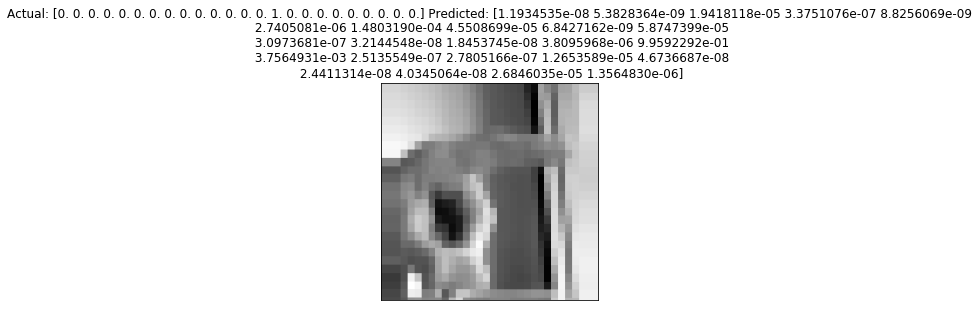

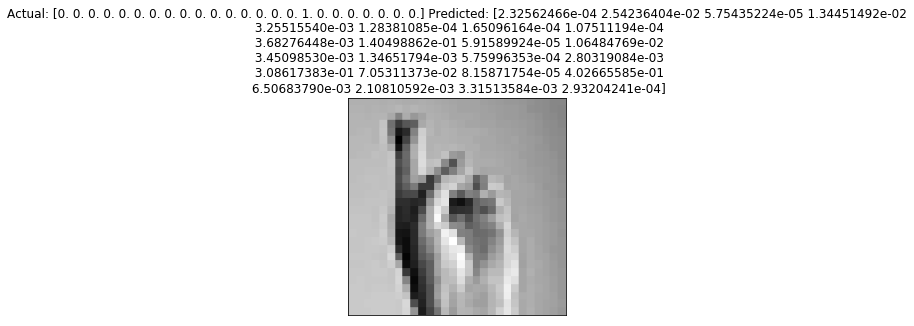

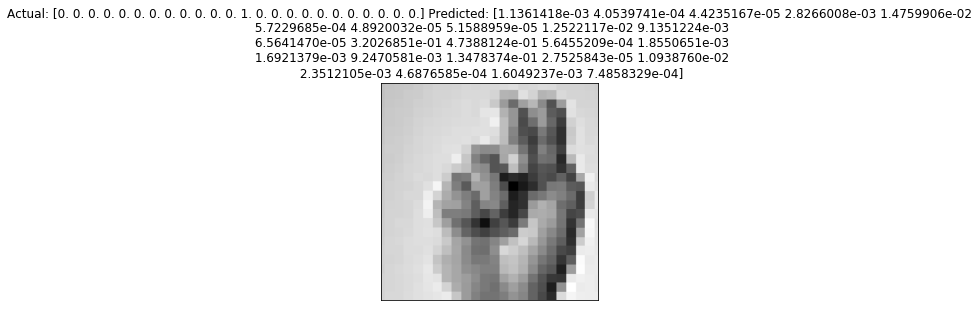

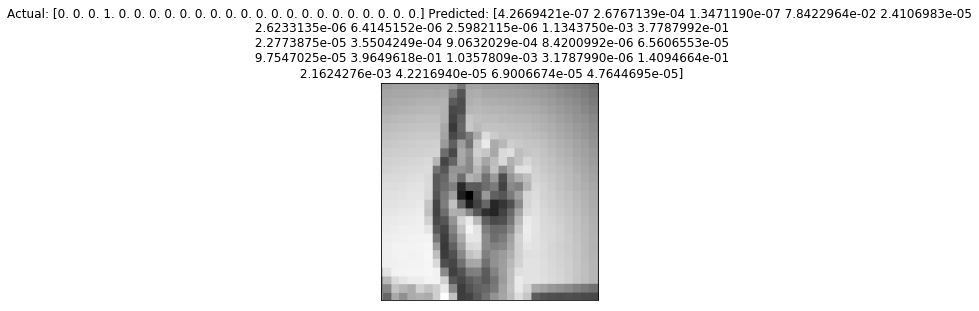

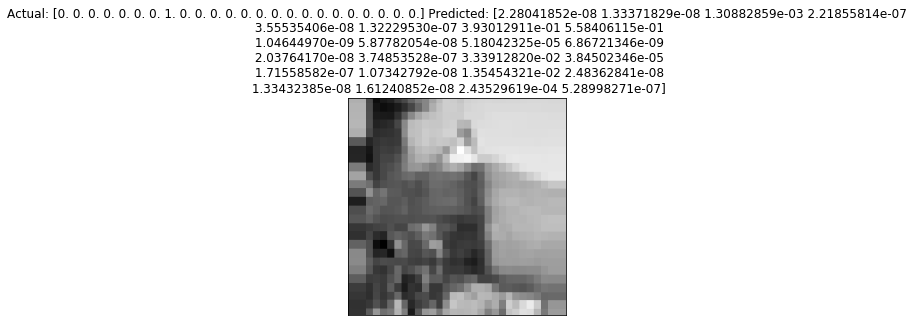

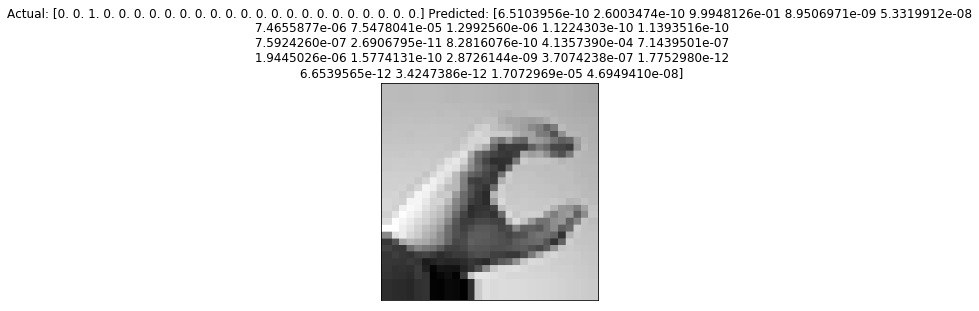

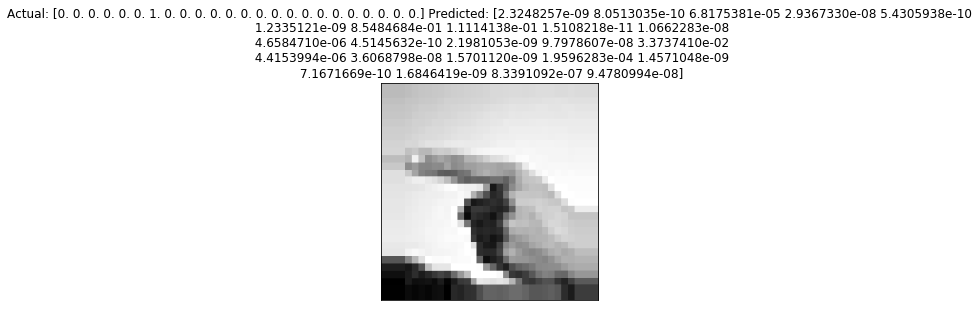

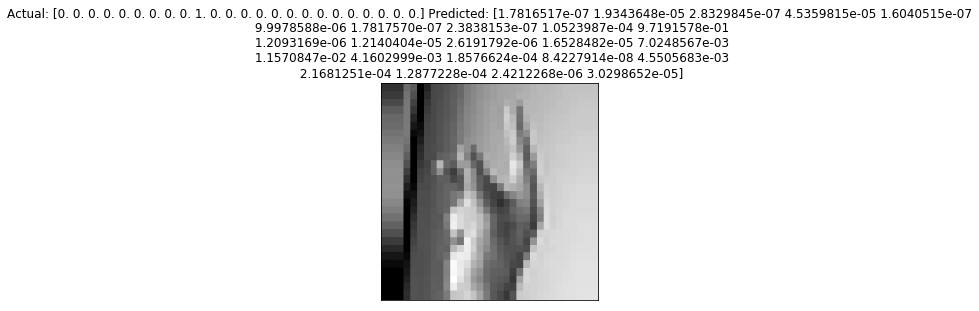

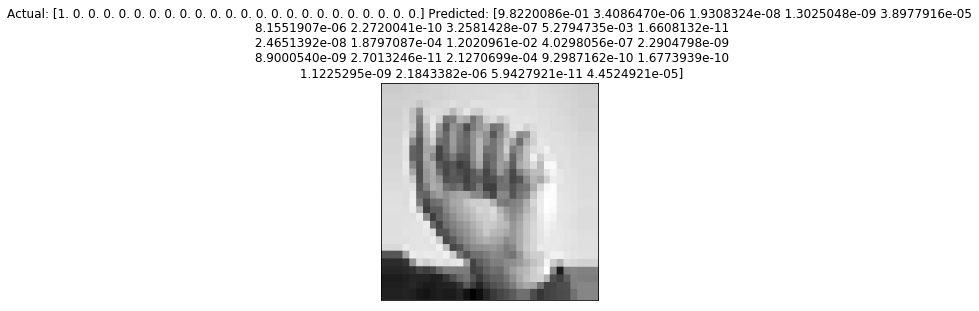

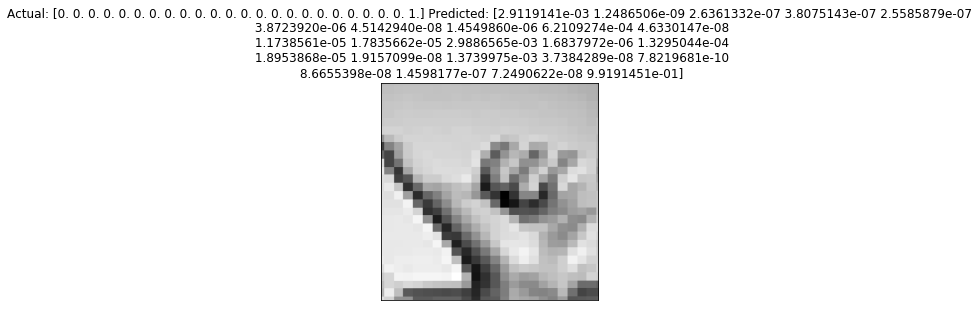

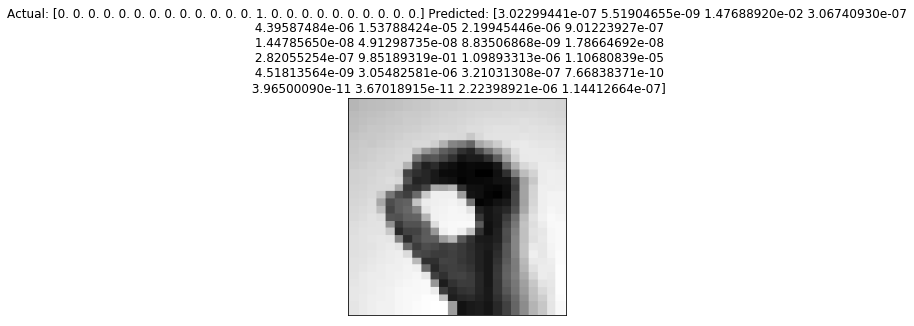

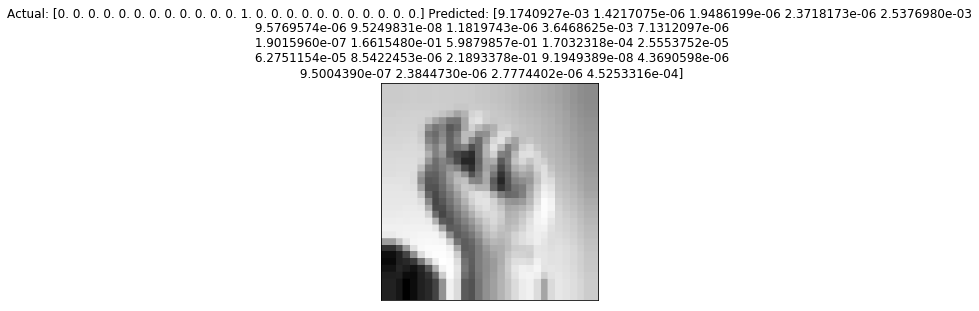

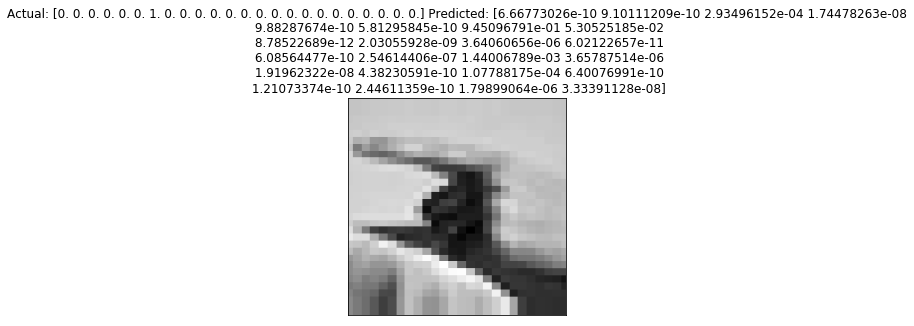

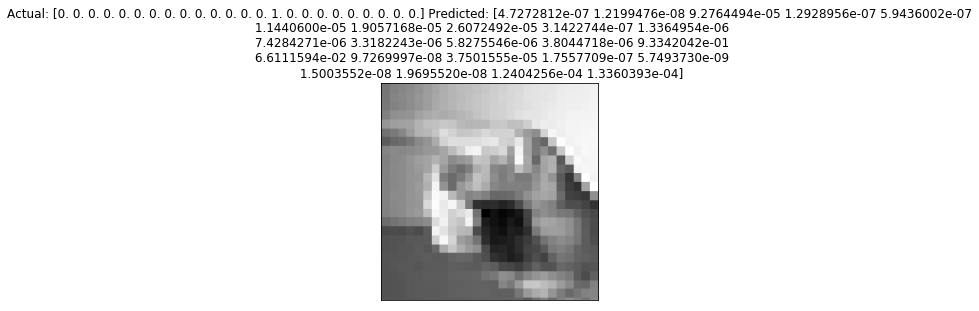

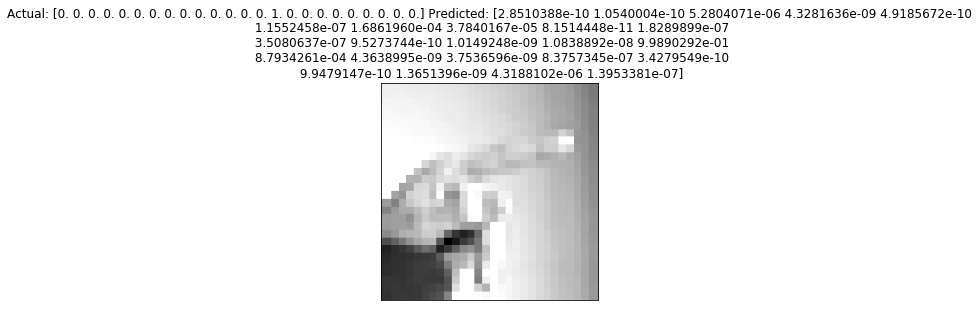

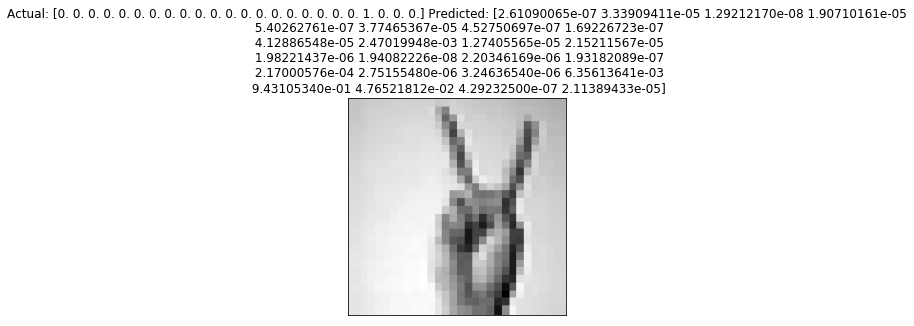

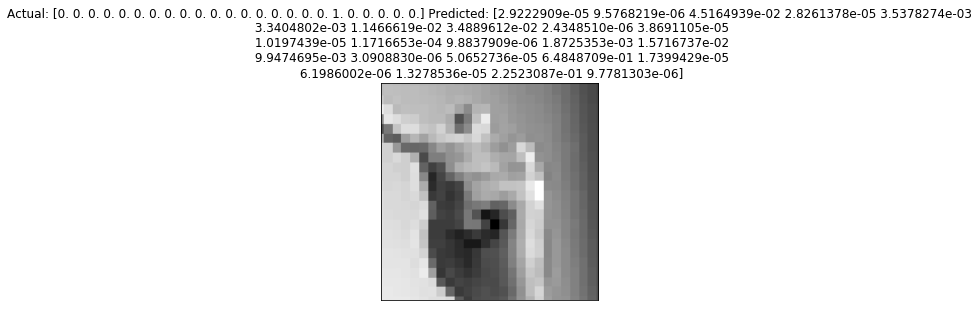

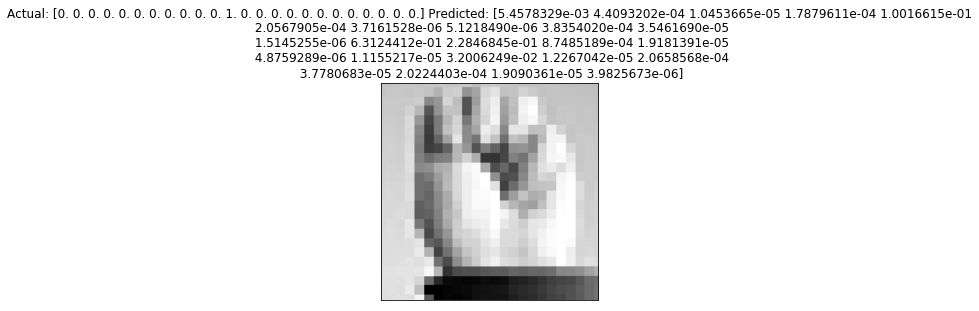

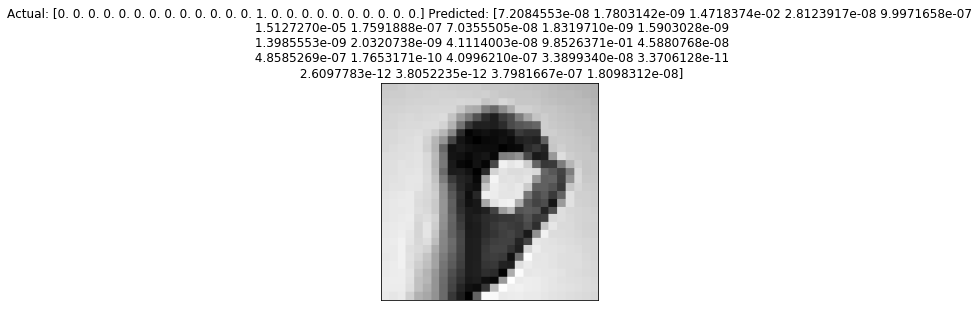

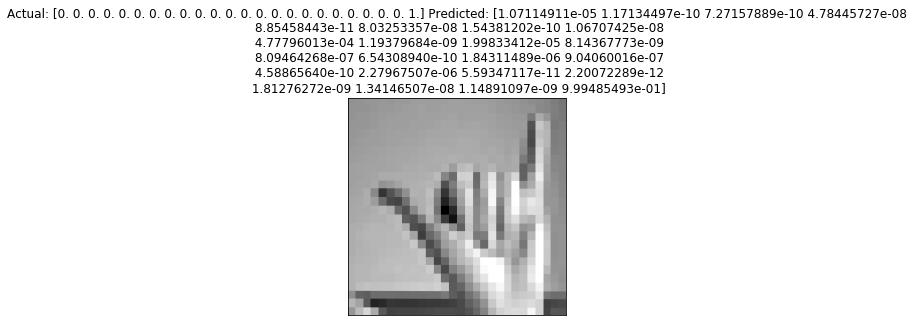

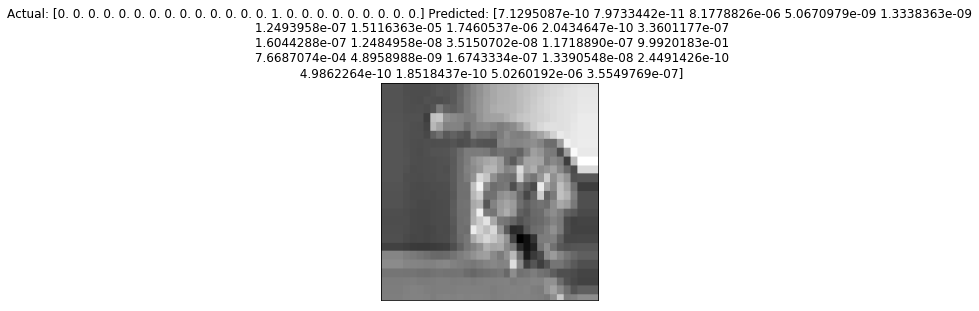

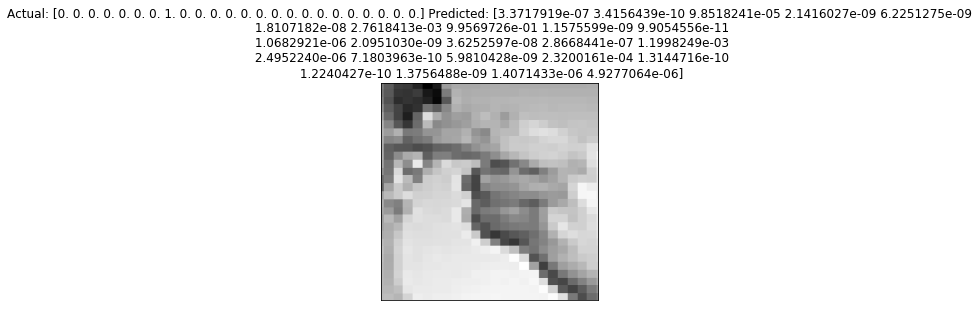

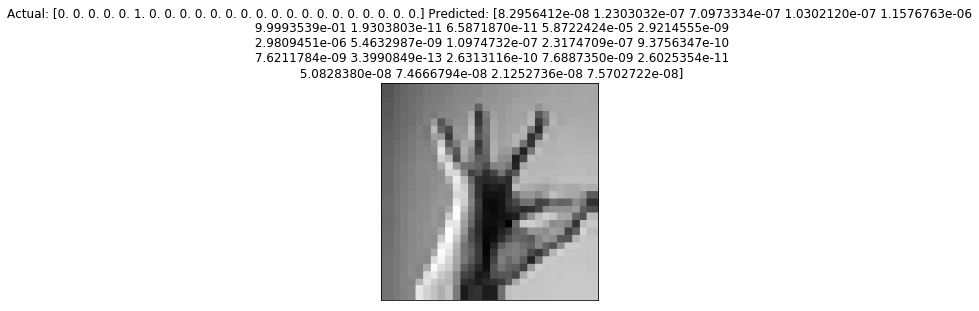

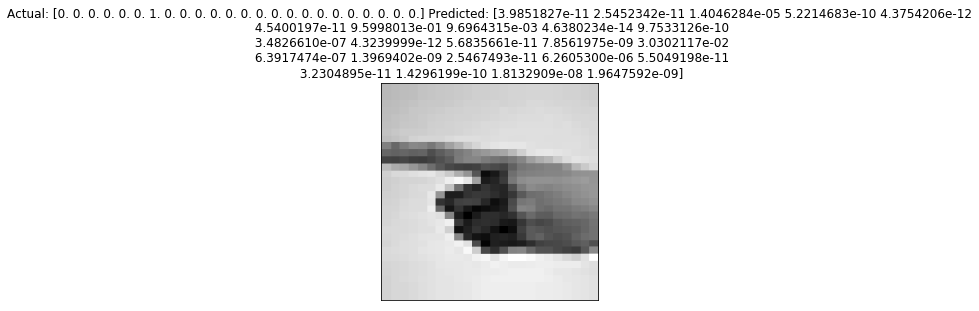

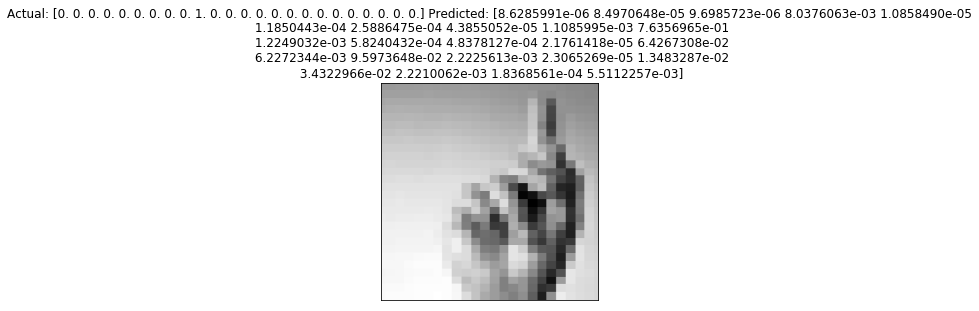

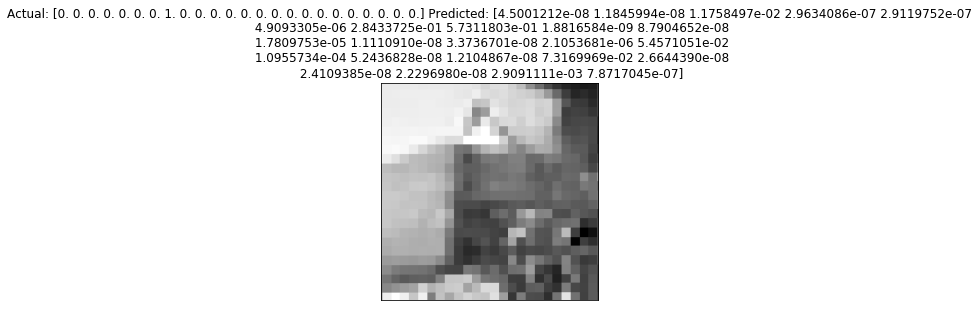

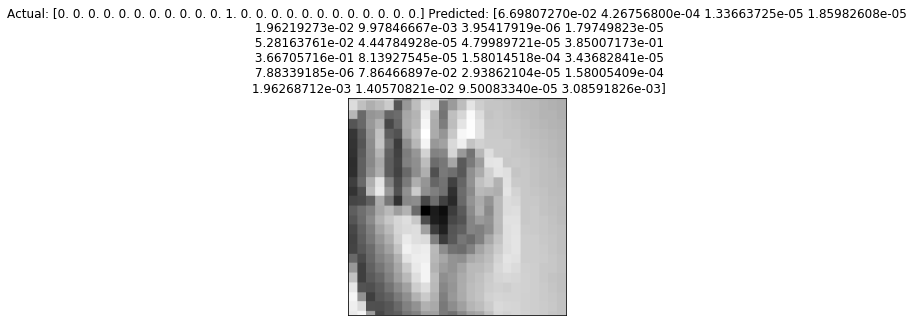

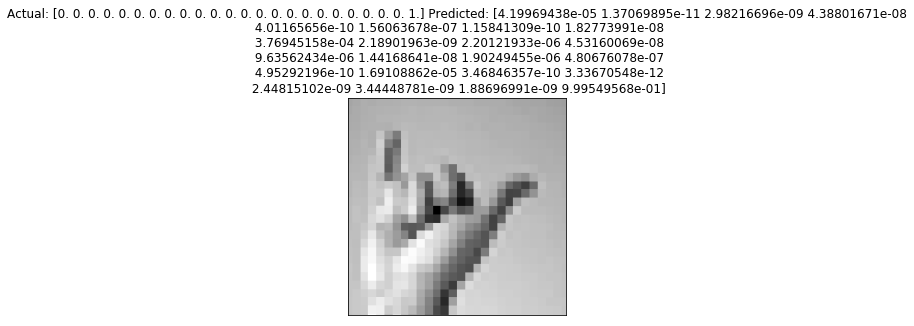

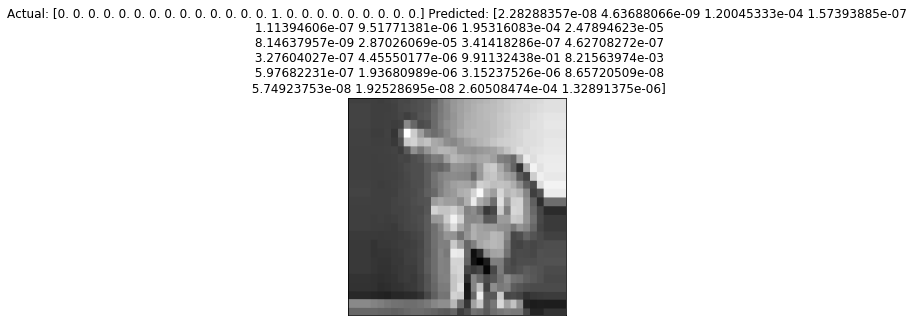

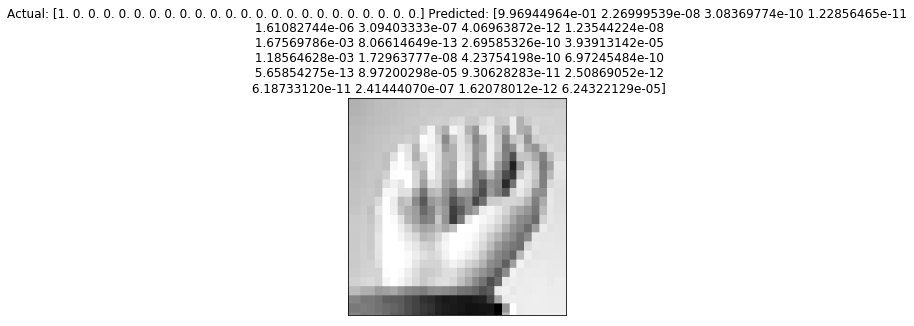

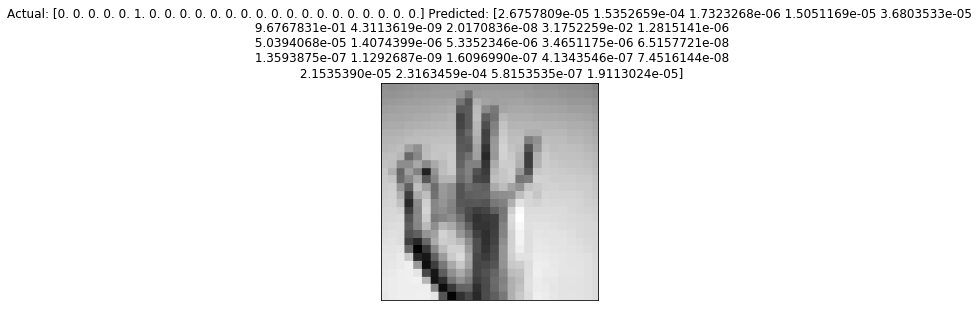

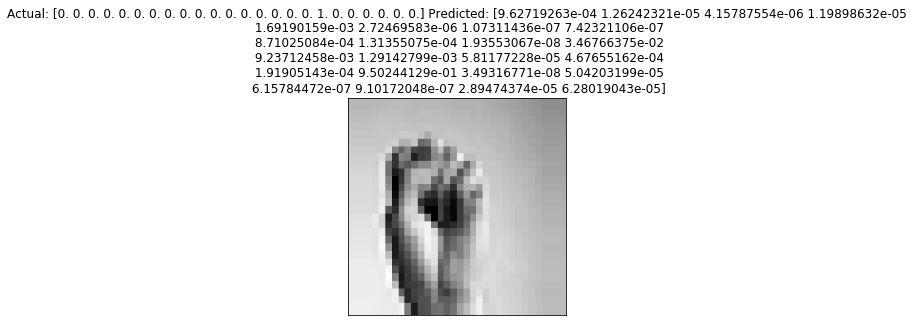

In [17]:
#with open('model.json','r') as f:
 #   json = f.read()
#loaded_model = model_from_json(json)

#loaded_model = Sequential()

base_model = VGG16(weights='imagenet', include_top = False, 
                   input_tensor=Input(shape=(224, 224, 3)))
loaded_model = Sequential()
for i in base_model.layers:
    loaded_model.add(i)
for i in loaded_model.layers:
    i.trainable = False
    
loaded_model.add(Flatten(input_shape = (224, 224, 3)))
loaded_model.add(Dense(256, activation = 'relu'))
loaded_model.add(Dropout(0.25))
loaded_model.add(Dense(256, activation = 'relu'))
loaded_model.add(Dropout(0.25))
loaded_model.add(Dense(24, activation = 'softmax'))


loaded_model.load_weights("weights.h5")

 
# evaluate loaded model on test data
loaded_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


Xtest,ytest = test_generator.next()
yhat = loaded_model.predict(Xtest)
l = len(Xtest)
for i in range (l):
    disp_image(Xtest[i])
    plt.title("Actual: "+str(ytest[i])+" Predicted: " + str(yhat[i]))
    plt.show()